<a href="https://colab.research.google.com/github/Mau-Ze-Ming/SC1003_Project/blob/main/sc1003proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SC1003 Mini-Project**

Aim: To strive for balanced and diverse team compositions, taking into account (1) school affiliation, (2) gender, and (3) current CGPA.




In [ ]:
# USE THIS
import csv
recordsFile=open("records.csv","r")
team_size = 5
count = 0 # Initialize counter for row processing and temporary list for row data
detailList = []
tutList = [[] for i in range(120)] # tutList is a list containing 120 lists representing 120 tutorial groups

# Process each row in the CSV file
for row in recordsFile:
    if count == 0:  # Skip the header row
        count += 1
        continue

    row = row.strip()  # Remove '\n'
    detailList = row.split(",") # Placeholder list containing all the information of a student as its elements

    tut = int(detailList[0].split('-')[1]) - 1
    # Determine the tutorial group index (ranging from G-1 to G-120)
    # Convert 'G-1' to 0, 'G-2' to 1, etc.
    # This is done by splitting the string 'G-1' to a list containing 2 elements, G and 1
    # Then, we take the second element and subtract 1 from that

    # Append the student details to the appropriate tutorial group
    tutList[tut].append({
        "Tutorial Group": detailList[0],
        "Student ID": detailList[1],
        "School": detailList[2],
        "Name": detailList[3],
        "Gender": detailList[4],
        "CGPA": float(detailList[5])  # Convert CGPA to float for numerical operations
    })
    # tutList now contains the details of all 6000 students, split into 120 sub-lists representing 120 tutorial groups

    count += 1
    if count > 6000:  # Stop after processing 6000 rows (all 6000 students)
        break

print("Information extracted from csv file")

Information extracted from csv file


In [ ]:
# Final

def sort_by_cgpa(student_list):
    # Sort students by CGPA using bubble sort
    # input student_list, which is a list of dictionaries, each representing a student with their details
    n = len(student_list) # Get the total number of students
    for i in range(n):
        for j in range(0, n-i-1): # Iterating over the portion of the list that is unsorted only
            if student_list[j]["CGPA"] > student_list[j+1]["CGPA"]:
                student_list[j], student_list[j+1] = student_list[j+1], student_list[j]
            # Compare each student to the next one. If the current student has a higher CGPA than the next one, swap them
    # We get a list sorted in ascending order of CGPA, with the highest cGPA student at the end of the list

def sorting(tut):
    # Main function that organizes students into teams
    # Input: tutorial group and its number
    # Output: list of balanced teams
    # Separate students by gender and sort by cGPA

    # Create separate lists for male and female students
    males = []
    females = []
    for student in tut: # Append the student dictionary to males list if the student is male, or to the females list if the student is female
        if student["Gender"] == "Male":
            males.append(student)
        else:
            females.append(student)

    # Sort both gender lists by CGPA in ascending order
    sort_by_cgpa(males)
    sort_by_cgpa(females)

    # Initialize the teams list, containing 10 lists within it, each representing a single team
    teams = [[] for i in range(10)]

    # First distribution: Alternate between males and females
    current_team = 0
    while males or females:
      # Continue while either gender list has students
      # If no student of desired genders left, assign the other gender
        if len(teams[current_team]) < 5:  # Check whether current team is full
            if len(teams[current_team]) % 2 == 0 and males:  # Loop through each team, alternating between males (even index) and females (odd index)
                male_student = males.pop(0)
                teams[current_team].append(male_student)  # Append the lowest CGPA male student into the current team
            elif females:
            # If there are still females unassigned a team
                female_student = females.pop(-1)
                teams[current_team].append(female_student) # Append the highest CGPA female student into the current team
            elif males:
            # If no females left, append male students
                male_student = males.pop(0)
                teams[current_team].append(male_student)

        current_team = (current_team + 1) % 10
        # This line ensures that the possible index of the current team is restricted to 0-9.
        # Each iteration of the loop modifies a different team, from 0-9, and then goes back to the first team (index 0)

    # Check and fix school diversity issues in each team
    for i in range(len(teams)):
    # Run this entire loop for each team in the tutorial group
        if len(teams[i]) == 5:  # Only process full teams
            # Get current team stats
            # Count frequency of each school in current team
            schools = {} # Create an empty dictionary names schools, and store the schools mentioned in a specific team
            for student in teams[i]:
                school = student["School"]
                if school in schools:
                    schools[school] += 1 # The school in question is the key, while the number of times the school appears in the team is the value
                else:
                    schools[school] = 1

            # Check each school for over-representation (more than 2 students)
            # Aim to achieve school diversity
            for school in schools:
                if schools[school] > 4: # Only run the following code if duplicate schools are found within a team
                    # Try to swap with students from other teams
                    for j in range(len(teams)):
                        if i != j and len(teams[j]) == 5: # Find a different team which has 5 members
                            # Count schools in other team
                            other_schools = {}
                            for other_student in teams[j]:
                                other_school = other_student["School"]
                                if other_school in other_schools:
                                    other_schools[other_school] += 1
                                else:
                                    other_schools[other_school] = 1

                            # Look for student to swap
                            student_index = 0
                            while student_index < len(teams[i]):
                                student1 = teams[i][student_index]  # Student1 is set to the student at student_index in the team (team i)
                                if student1["School"] == school:  # Checks if student1's school is a duplicated school, ie. the school we are trying to swap out
                                    other_index = 0
                                    while other_index < len(teams[j]):
                                        student2 = teams[j][other_index]  # Student2 is set to the student at other_index in the other team (team j)
                                        if (student2["School"] != school and  # If the school of student2 is not the duplicated school
                                            student2["School"] not in schools and # and if student2's school is not in any of the schools of the students in team i
                                            student2["Gender"] == student1["Gender"]): # and if student2 is of the same gender as student1
                                                 # Since we want the swapped student to have the same gender, retaining gender diversity
                                            # Perform swap
                                            temp = teams[i][student_index]
                                            teams[i][student_index] = teams[j][other_index]
                                            teams[j][other_index] = temp
                                            break
                                            # Break out of the inner while loop, moving on to the line which adds 1 to the student_index
                                        other_index += 1  # Find another student in team j
                                student_index += 1 # Check other students in team i if his/her school is a duplicated school in the team
                            break # breaks out of the for j in range(len(teams)) loop to stop further trying to find possible swaps
                            # In the worst case, once all iterations of other_index and student_index are carried out,
                            # and if no student is found in team j which meets our 3 criteria above, no swap will be performed (retains diversity of gender and cGPA)
    team_num = 1

    # Assign sequential team numbers to each team
    for team in teams:     # Iterate through each team in the tutorial group
        for student in team:
            student["Team Assigned"] = team_num   # Assign team numbers
        team_num += 1

    return teams

def save_all_tutorial_groups_to_csv(tutList):
    # Create new CSV file in write mode with UTF-8 encoding
    with open('team_assignments.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write header row with column names
        writer.writerow([
            'Tutorial Group',
            'Student ID',
            'Name',
            'School',
            'Gender',
            'CGPA',
            'Team Assigned'
        ])

        # Process each tutorial group
        tutorial_group_number = 1
        for tut in tutList:
        # As mentioned at the start, tutList contains 120 lists, each representing a tutorial group
        # tut represents the list of 50 dictionaries (students) in a single tutorial group and all their details
            teams = sorting(tut)
            # Sort students into teams within current tutorial group
            # Run the sorting function, taking tut as the parameter

            # Write each student's data (including their team assgined) to CSV
            for team in teams:
                for student in team:
                    writer.writerow([
                        str(student.get('Tutorial Group')),
                        str(student.get('Student ID')),
                        str(student.get('Name')),
                        str(student.get('School')),
                        str(student.get('Gender')),
                        str(student.get('CGPA')),
                        str(student.get('Team Assigned'))
                    ])
            tutorial_group_number += 1

save_all_tutorial_groups_to_csv(tutList)
# tutList contains all tutorial groups

print('Sorting complete')

Sorting complete


In [ ]:
# Code for 4 -10 (Exception: 9)
import csv
recordsFile=open("records.csv","r")
team_size = 0

while team_size < 4 or team_size > 10:
  input_group_size = input("Please enter the selected group size (4 to 10): ")
  try:
    team_size = int(input_group_size) # See if the input value is indeed an integer
    if team_size == 9:  # Set team size to be 8 if 9 is inputted
        team_size = 8
    # Both teams of 8 and teams of 9 will give the reuslts of 4 teams of 8 and 2 teams of 9
    else:
        team_size == team_size
  except ValueError:
    print("Invalid input. Please try again")
    team_size = 0 #return group_size = 0 if the input is invalid eg. a string

count = 0  # Initialize counter for row processing and temporary list for row data
detailList = []
tutList = [[] for i in range(120)] # tutList is a list containing 120 lists representing 120 tutorial groups

# Process each row in the CSV file
for row in recordsFile:
    if count == 0:  # Skip the header row
        count += 1
        continue

    row = row.strip()  # Remove '\n'
    detailList = row.split(",") # Placeholder list containing all the information of a student as its elements

    tut = int(detailList[0].split('-')[1]) - 1
    # Determine the tutorial group index (ranging from G-1 to G-120)
    # Convert 'G-1' to 0, 'G-2' to 1, etc.
    # This is done by splitting the string 'G-1' to a list containing 2 elements, G and 1
    # Then, we take the second element and subtract 1 from that

    # Append the student details to the appropriate tutorial group
    tutList[tut].append({
        "Tutorial Group": detailList[0],
        "Student ID": detailList[1],
        "School": detailList[2],
        "Name": detailList[3],
        "Gender": detailList[4],
        "CGPA": float(detailList[5])  # Convert CGPA to float for numerical operations
    })
    # tutList now contains the details of all 6000 students, split into 120 sub-lists representing 120 tutorial groups

    count += 1
    if count > 6000:  # Stop after processing 6000 rows (all 6000 students)
        break

print("Information extracted from csv file")

def sort_by_cgpa(student_list):
    # Sort students by CGPA using bubble sort
    # input student_list, which is a list of dictionaries, each representing a student with their details
    n = len(student_list) # Get the total number of students
    for i in range(n):
        for j in range(0, n-i-1): # Iterating over the portion of the list that is unsorted only
            if student_list[j]["CGPA"] > student_list[j+1]["CGPA"]:
                student_list[j], student_list[j+1] = student_list[j+1], student_list[j]
            # Compare each student to the next one. If the current student has a higher CGPA than the next one, swap them
    # We get a list sorted in ascending order of CGPA, with the highest cGPA student at the end of the list

def sorting(tut):
    # Main function that organizes students into teams
    # Input: tutorial group and its number
    # Output: list of balanced teams
    # Separate students by gender and sort by cGPA

    # Create separate lists for male and female students
    males = []
    females = []
    for student in tut: # Append the student dictionary to males list if the student is male, or females list if the student is female
        if student["Gender"] == "Male":
            males.append(student)
        else:
            females.append(student)

    # Sort both gender lists by CGPA in ascending order
    sort_by_cgpa(males)
    sort_by_cgpa(females)

    # Initialize the teams list, containing num_of_teams = (50//team_size) lists within it, each representing a single team
    # For example, if team_size = 6, the teams list would contain 8 lists (8 teams)
    num_of_teams = 50//team_size
    teams = [[] for i in range(num_of_teams)]


    # First distribution: Alternate between males and females
    current_team = 0
    while males or females:
      # Continue while either gender list has students
      # If no student of desired genders left, assign the other gender
      # IMPORTANT: we removed if len(teams[current_team]) < 5 as a condition, since for other group sizes, there will usually be a remainder
      # These remaining students will still continue to be added according to the conditions below, despite the team size exceeding the desired team size input by the user
        if len(teams[current_team]) % 2 == 0 and males: # Loop through each team, alternating between males (even index) and females (odd index)
            male_student = males.pop(0)
            teams[current_team].append(male_student) # Append the lowest CGPA male student into the current team
        elif females:
        # If there are still females unassigned a team
            female_student = females.pop(-1)
            teams[current_team].append(female_student) # Append the highest CGPA female student into the current team
        elif males:
        # If no females left, append male students
            male_student = males.pop(0)
            teams[current_team].append(male_student)

        current_team = (current_team + 1) % num_of_teams
        # This line ensures that the possible index of the current team is restricted to 0-n.
        # Each iteration of the loop modifies a different team, from 0-n, and then goes back to the first team (index 0)

    # Check and fix school diversity issues in each team
    for i in range(len(teams)):
    # Run this entire loop for each team in the tutorial group
        if len(teams[i]) == team_size:  # Only process full teams
            # Get current team stats
            # Count frequency of each school in current team
            schools = {} # Create an empty dictionary names schools, and store the schools mentioned in a specific team
            for student in teams[i]:
                school = student["School"]
                if school in schools:
                    schools[school] += 1 # The school in question is the key, while the number of times the school appears in the team is the value
                else:
                    schools[school] = 1

            # Check each school for over-representation (more than 2 students)
            # Aim to achieve school diversity
            for school in schools:
                if schools[school] > 4: # Only run the following code if duplicate schools are found within a team
                    # Try to swap with students from other teams
                    for j in range(len(teams)):
                        if i != j and len(teams[j]) == team_size: # Find a different team which has full members (team_size)
                            # Count schools in other team
                            other_schools = {}
                            for other_student in teams[j]:
                                other_school = other_student["School"]
                                if other_school in other_schools:
                                    other_schools[other_school] += 1
                                else:
                                    other_schools[other_school] = 1

                            # Look for student to swap
                            student_index = 0
                            while student_index < len(teams[i]):
                                student1 = teams[i][student_index] # Student1 is set to the student at student_index in the team (team i)
                                if student1["School"] == school: # Checks if student1's school is a duplicated school, ie. the school we are trying to swap out
                                    other_index = 0
                                    while other_index < len(teams[j]):
                                        student2 = teams[j][other_index] # Student2 is set to the student at other_index in the other team (team j)
                                        if (student2["School"] != school and # If the school of student2 is not the duplicated school
                                            student2["School"] not in schools and # and if student2's school is not in any of the schools of the students in team i
                                            student2["Gender"] == student1["Gender"]): # and if student2 is of the same gender as student1
                                                 # Since we want the swapped student to have the same gender, retaining gender diversity
                                            # Perform swap
                                            temp = teams[i][student_index]
                                            teams[i][student_index] = teams[j][other_index]
                                            teams[j][other_index] = temp
                                            break
                                            # Break out of the inner while loop, moving on to the line which adds 1 to the student_index
                                        other_index += 1  # Find another student in team j
                                student_index += 1 # Check other students in team i if his/her school is a duplicated school in the team
                            break # breaks out of the for j in range(len(teams)) loop to stop further trying to find possible swaps
                            # In the worst case, once all iterations of other_index and student_index are carried out,
                            # and if no student is found in team j which meets our 3 criteria above, no swap will be performed
    team_num = 1

    # Assign sequential team numbers to each team
    for team in teams:     # Iterate through each team in the tutorial group
        for student in team:
            student["Team Assigned"] = team_num   # Assign team numbers
        team_num += 1

    return teams


def save_all_tutorial_groups_to_csv(tutList):
    # Create new CSV file in write mode with UTF-8 encoding
    with open('team_assignments.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write header row with column names
        writer.writerow([
            'Tutorial Group',
            'Student ID',
            'Name',
            'School',
            'Gender',
            'CGPA',
            'Team Assigned'
        ])

        # Process each tutorial group
        tutorial_group_number = 1
        for tut in tutList:
        # As mentioned at the start, tutList contains 120 lists, each representing a tutorial group
        # tut represents the list of 50 dictionaries (students) in a single tutorial group and all their details
            teams = sorting(tut)
            # Sort students into teams within current tutorial group
            # Run the sorting function, taking tut as the parameter

            # Write each student's data (including their team assgined) to CSV
            for team in teams:
                for student in team:
                    writer.writerow([
                        str(student.get('Tutorial Group')),
                        str(student.get('Student ID')),
                        str(student.get('Name')),
                        str(student.get('School')),
                        str(student.get('Gender')),
                        str(student.get('CGPA')),
                        str(student.get('Team Assigned'))
                    ])
            tutorial_group_number += 1

save_all_tutorial_groups_to_csv(tutList)
# tutList contains all tutorial groups

print('Sorting complete')

Please enter the selected group size (4 to 10): 5
Information extracted from csv file
Sorting complete


Visualistion using matplotlib

Information extracted from csv file
Sorting complete


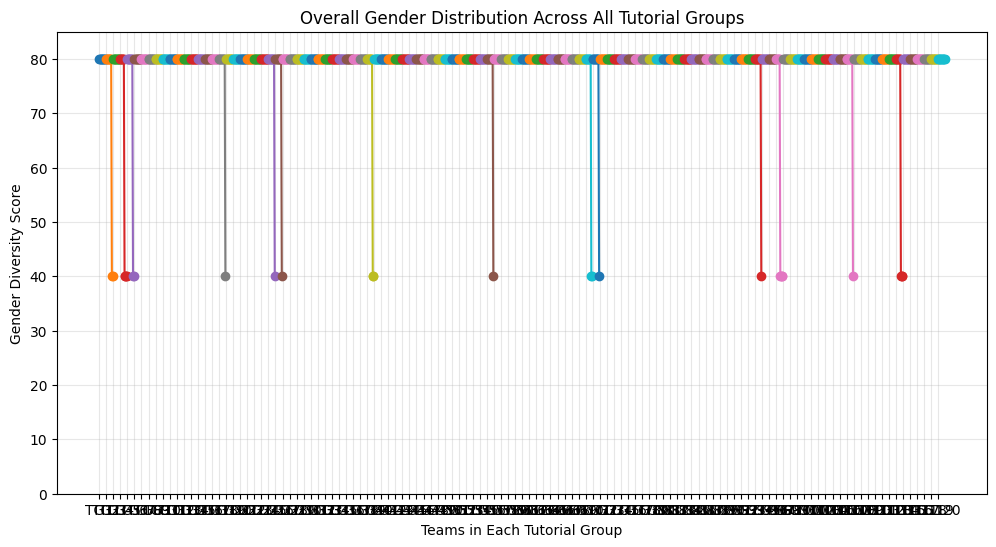

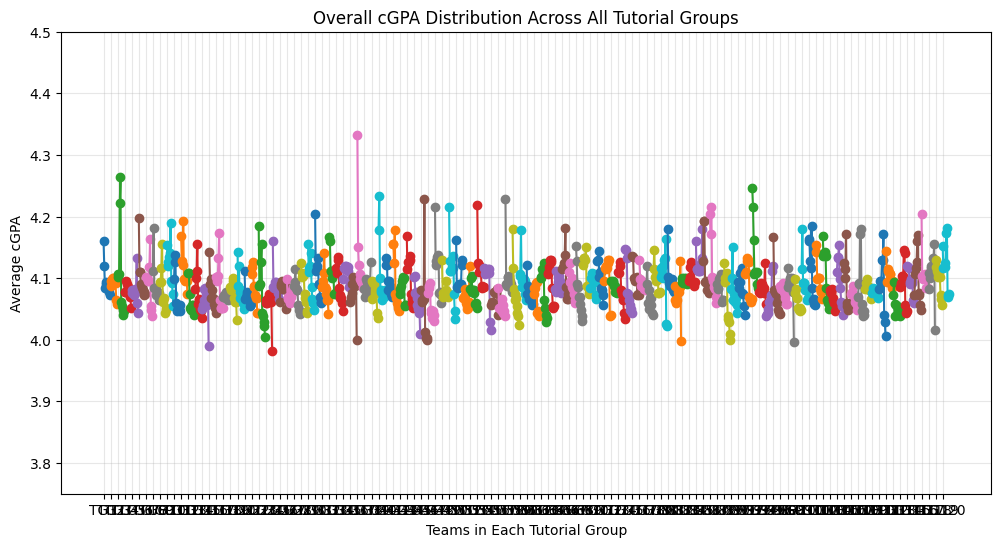

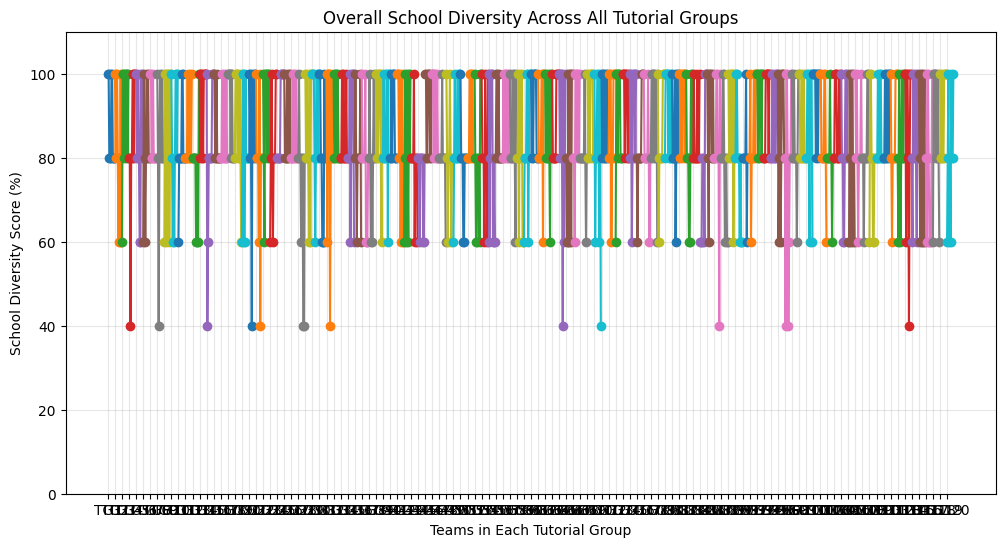

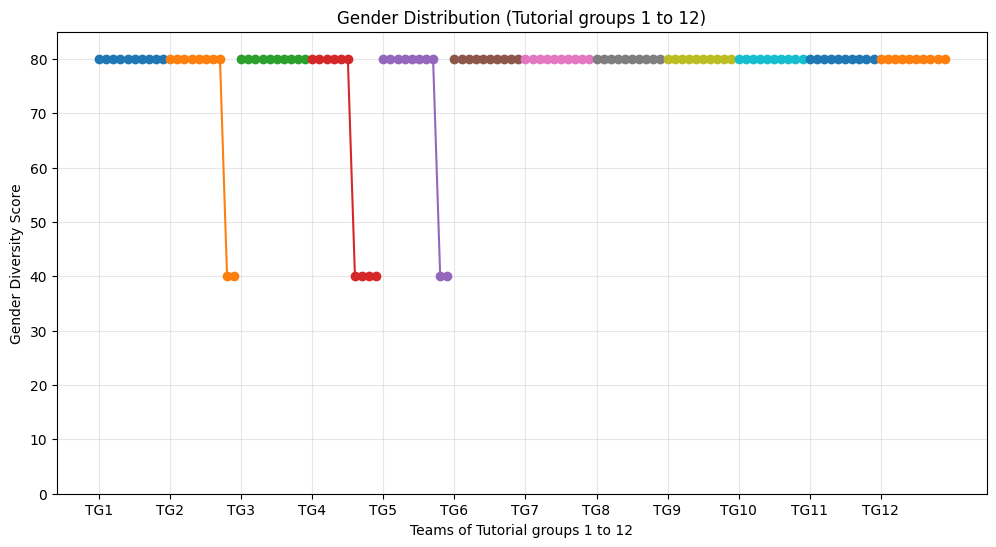

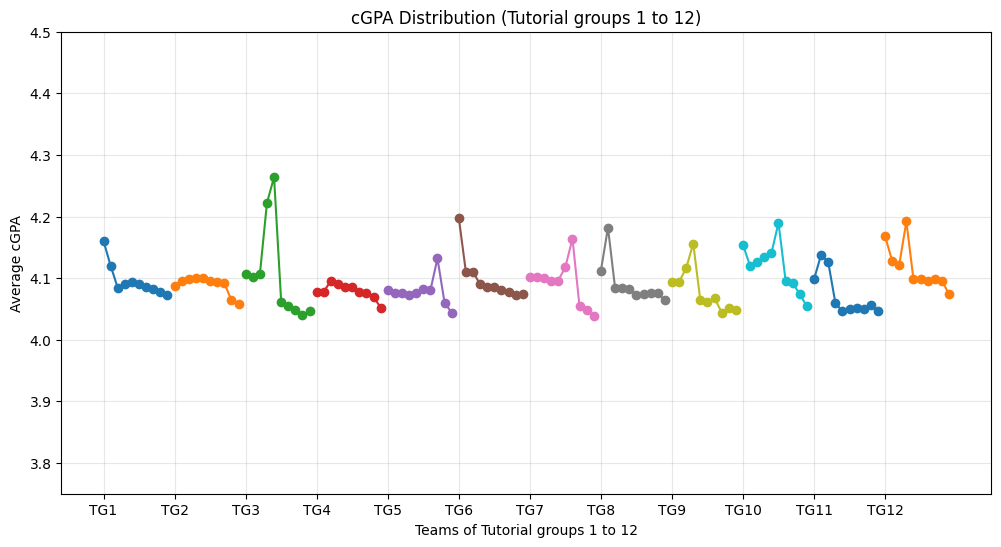

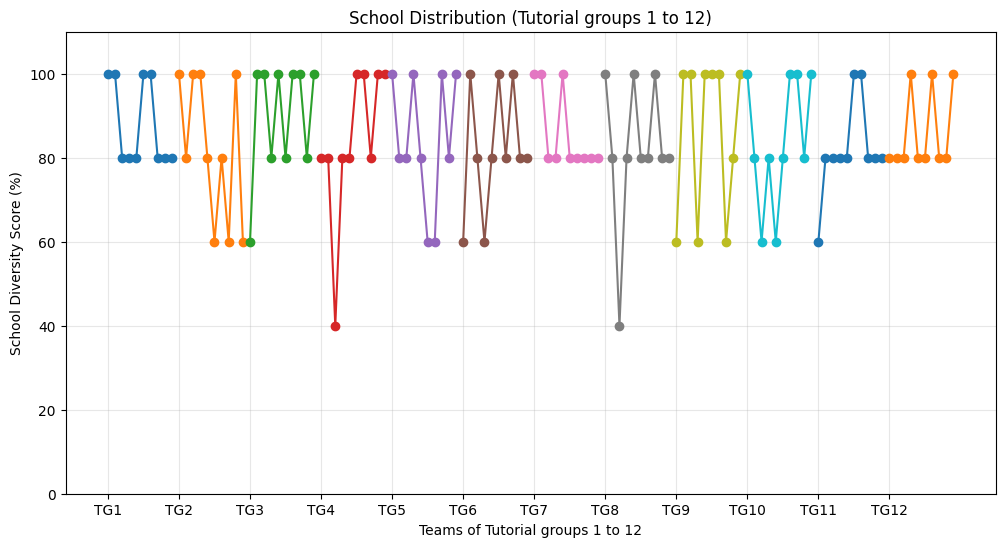

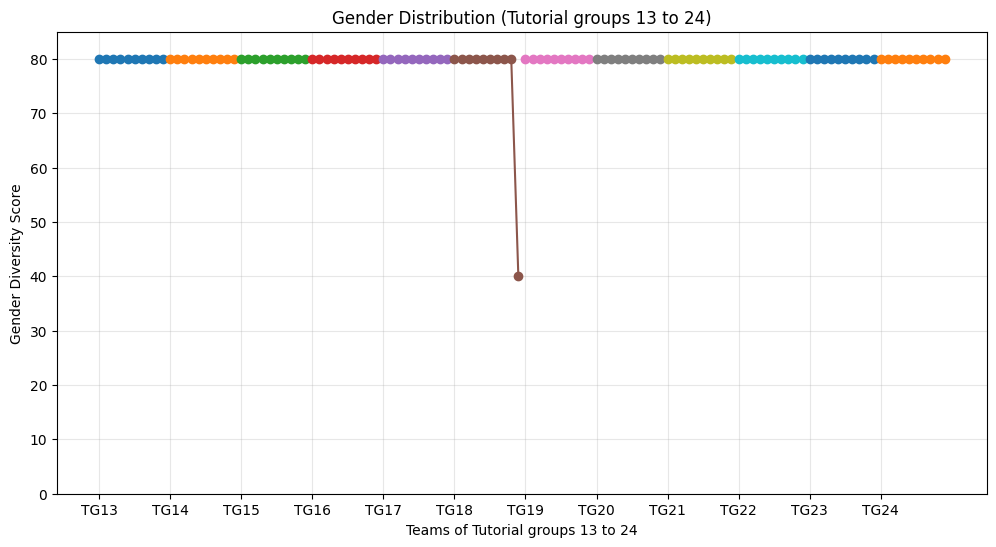

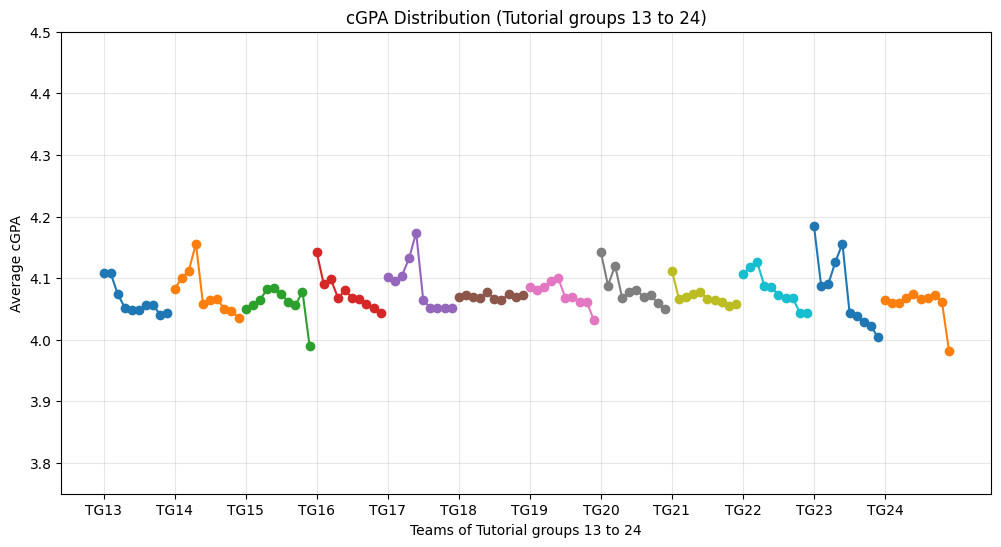

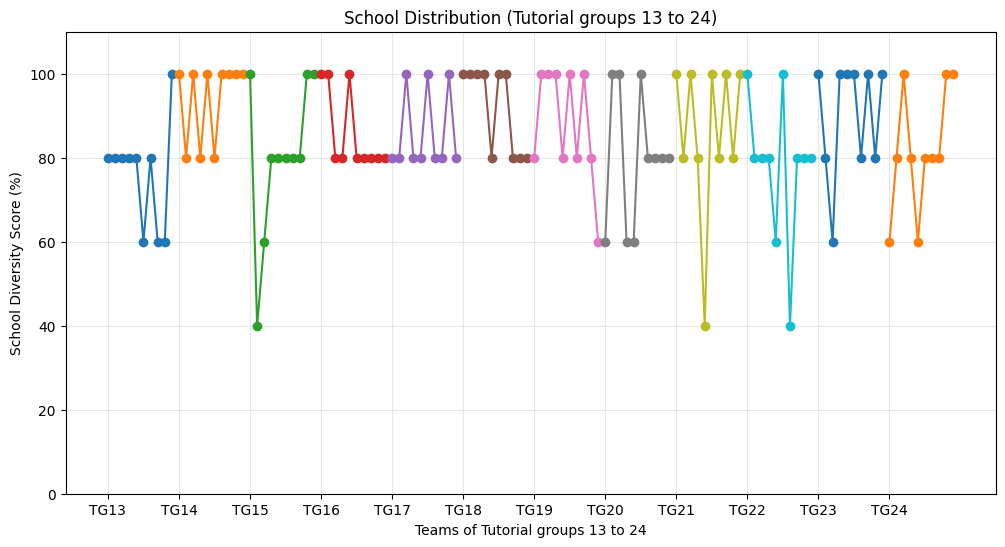

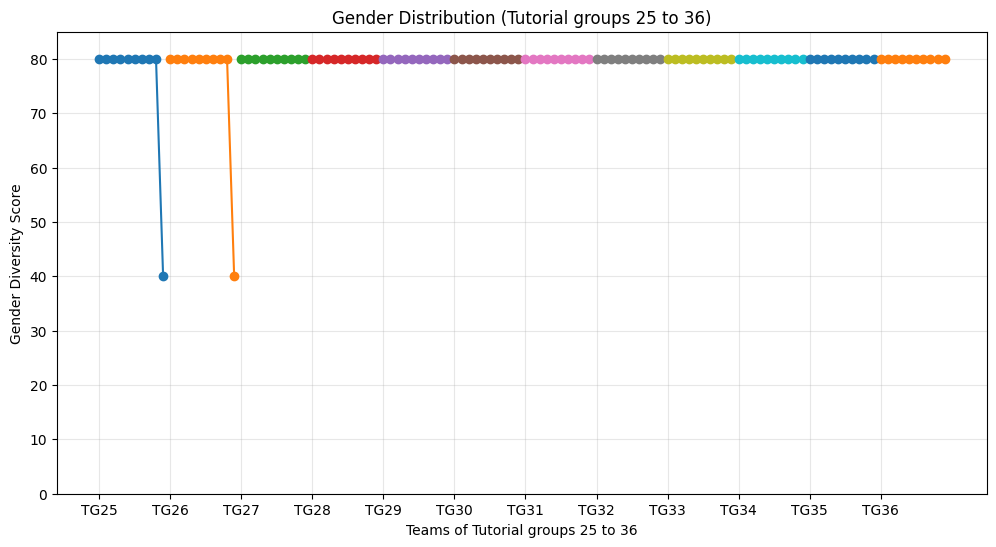

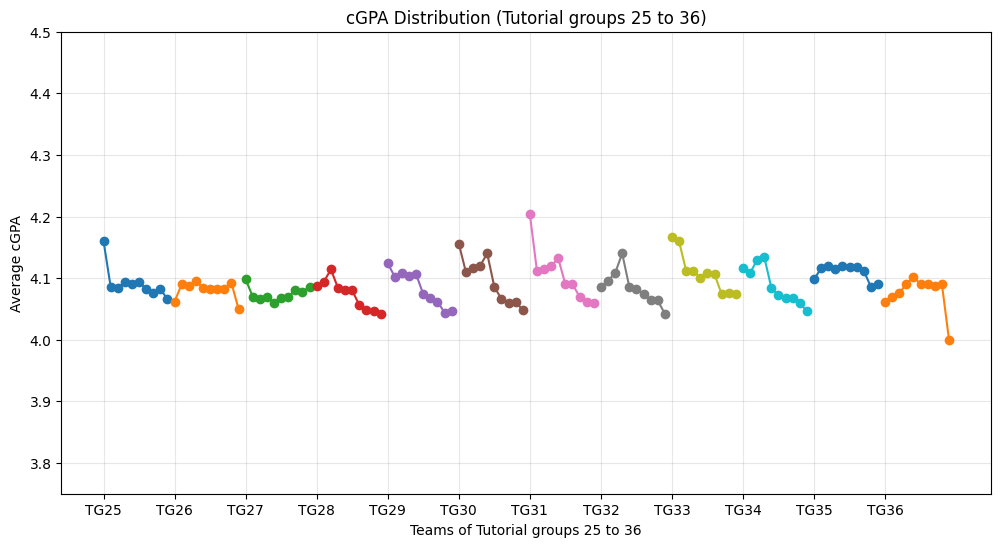

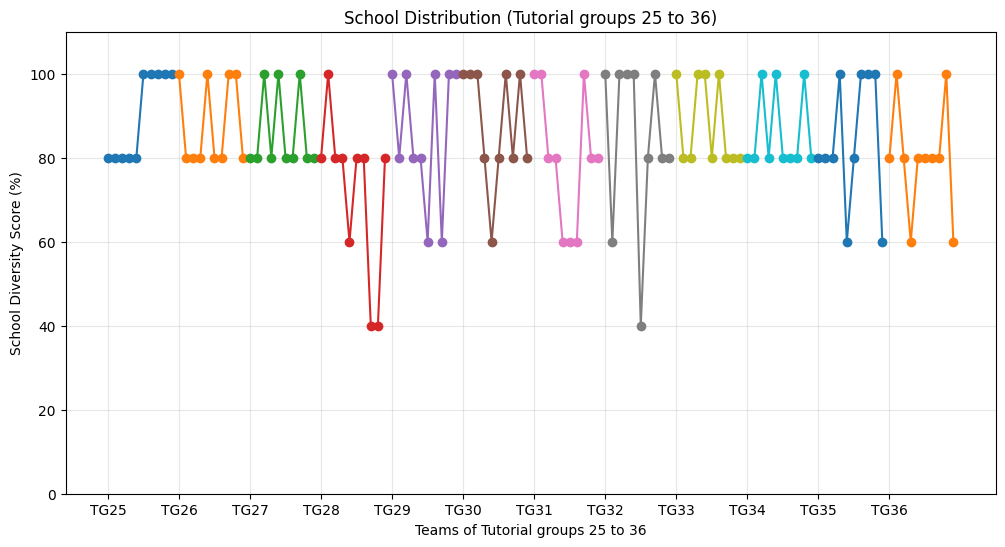

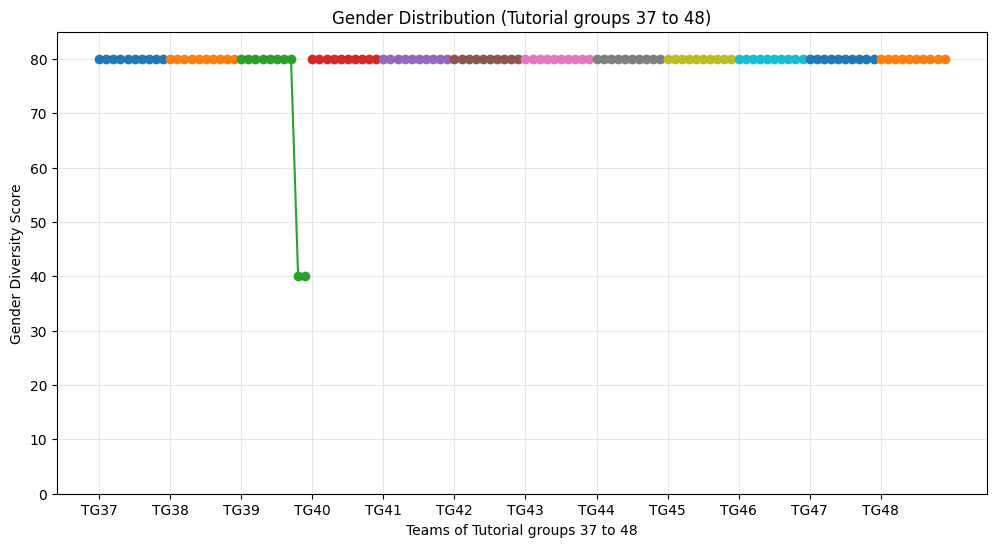

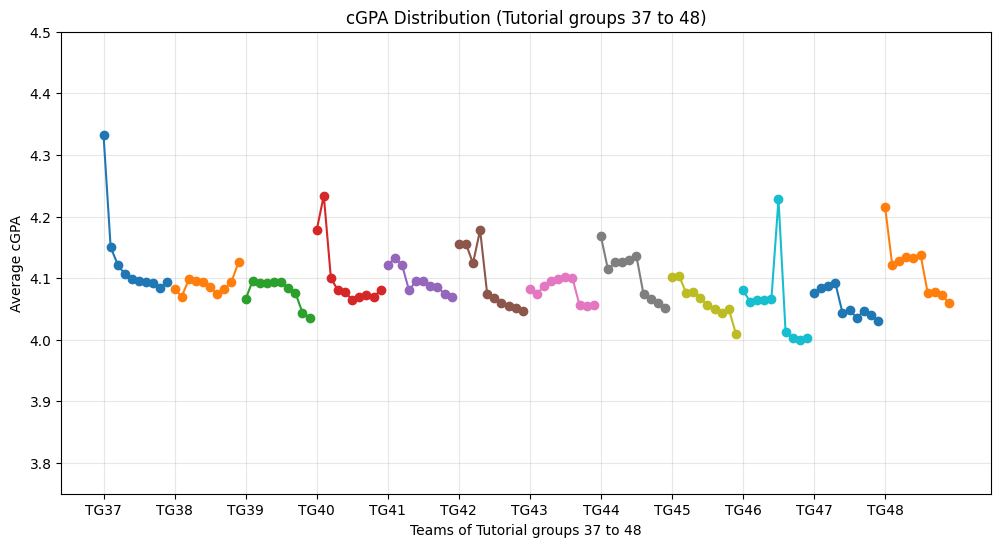

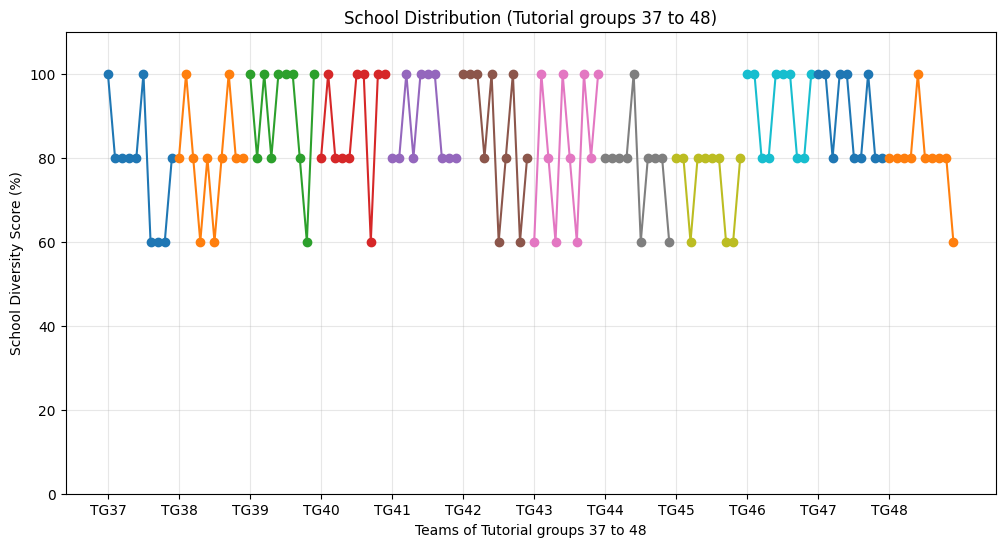

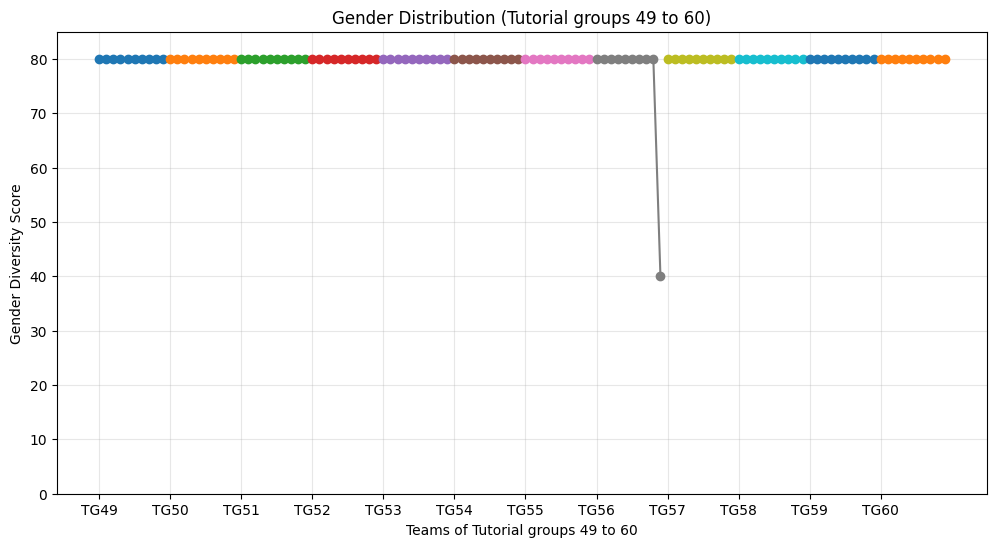

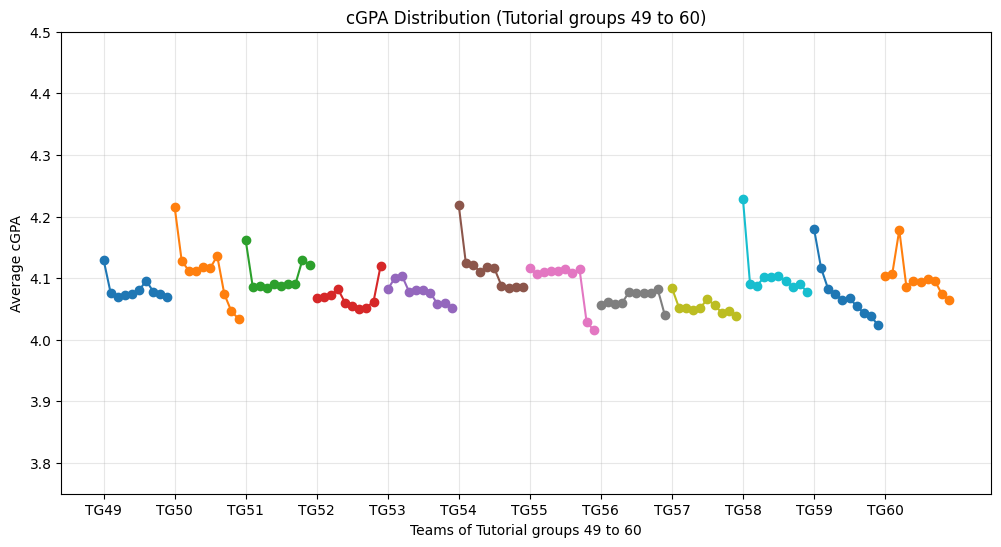

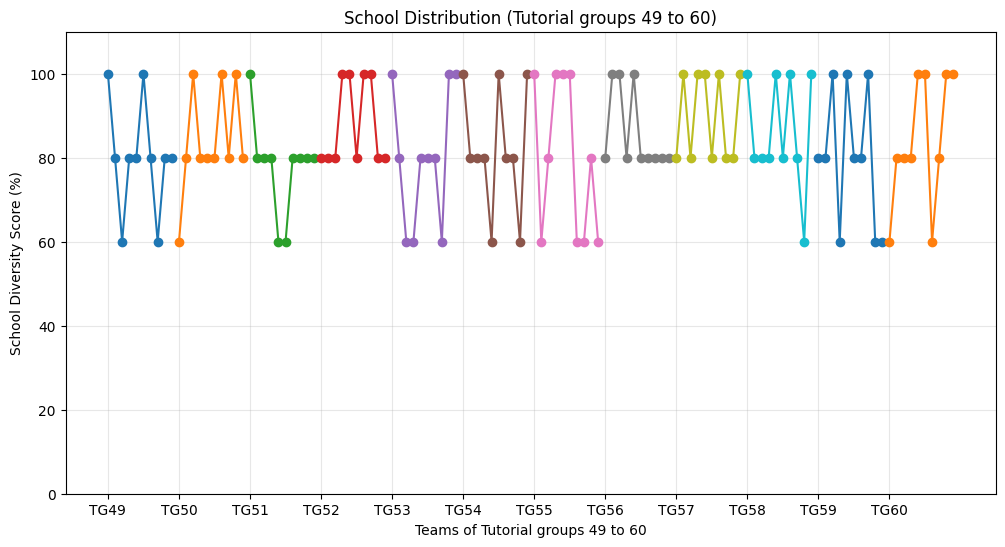

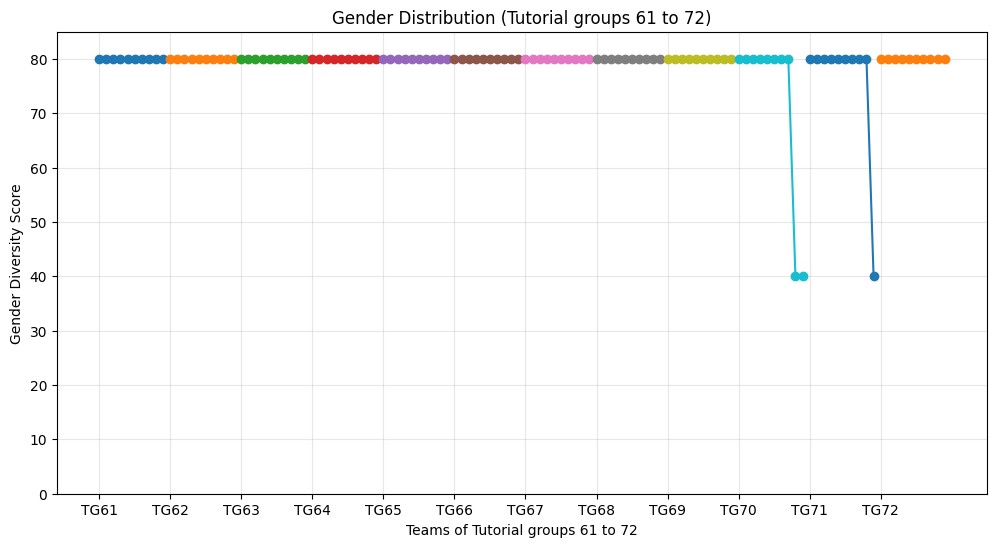

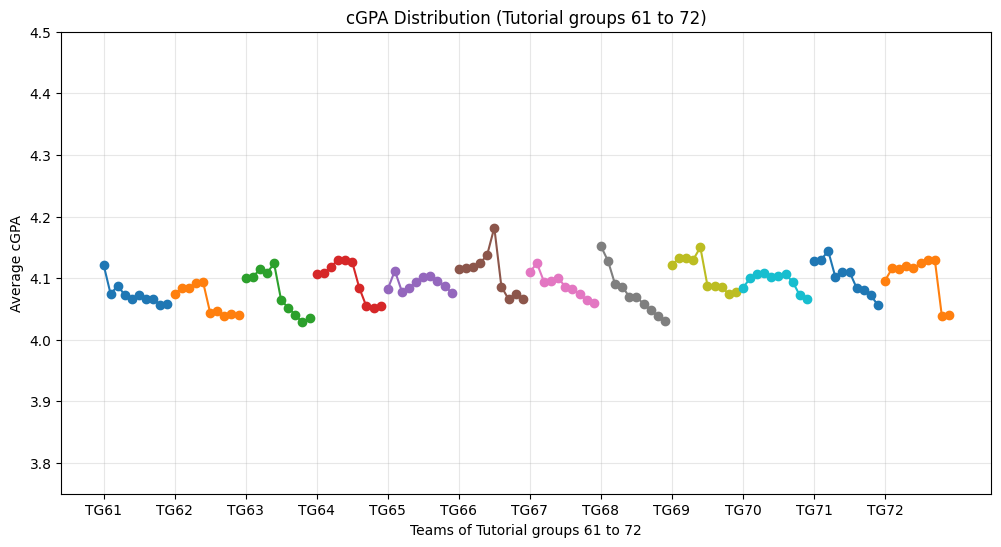

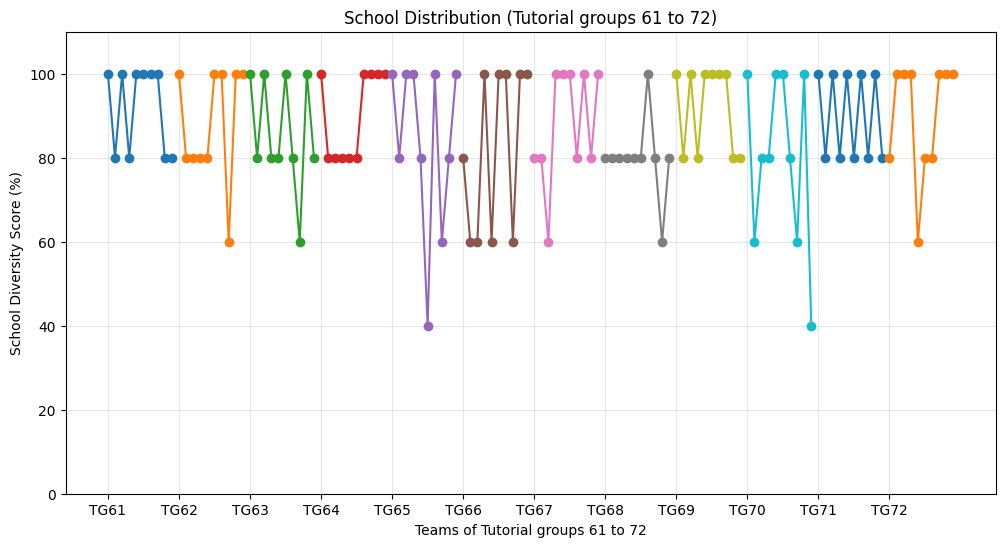

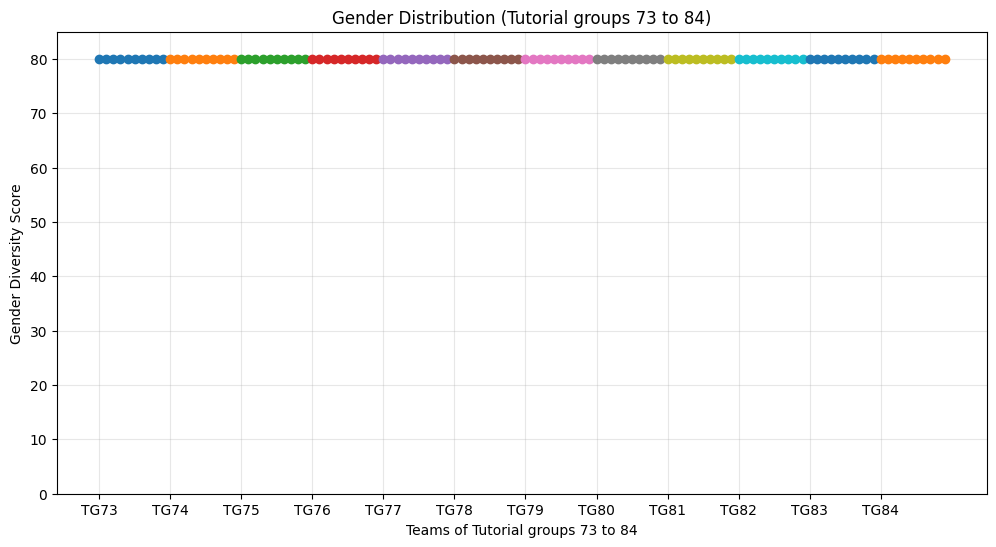

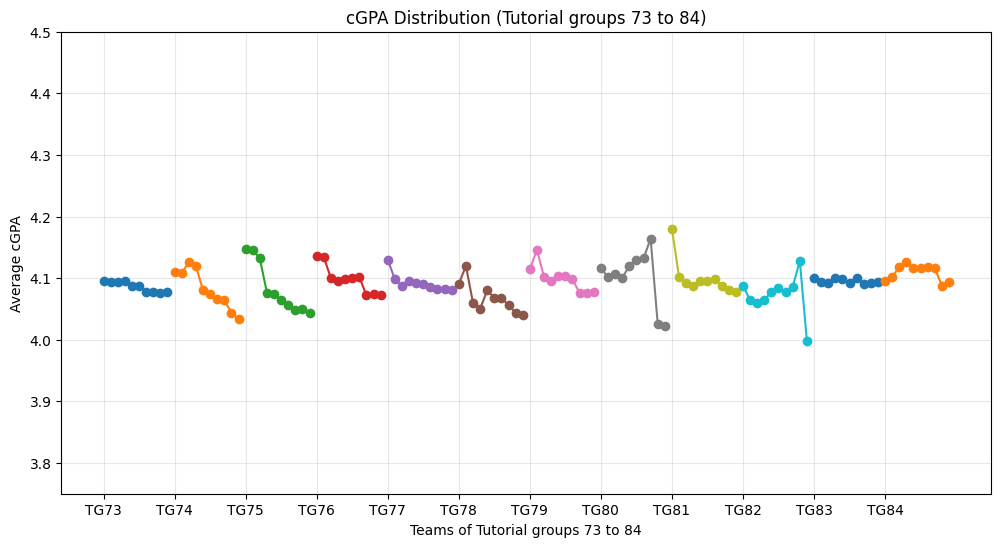

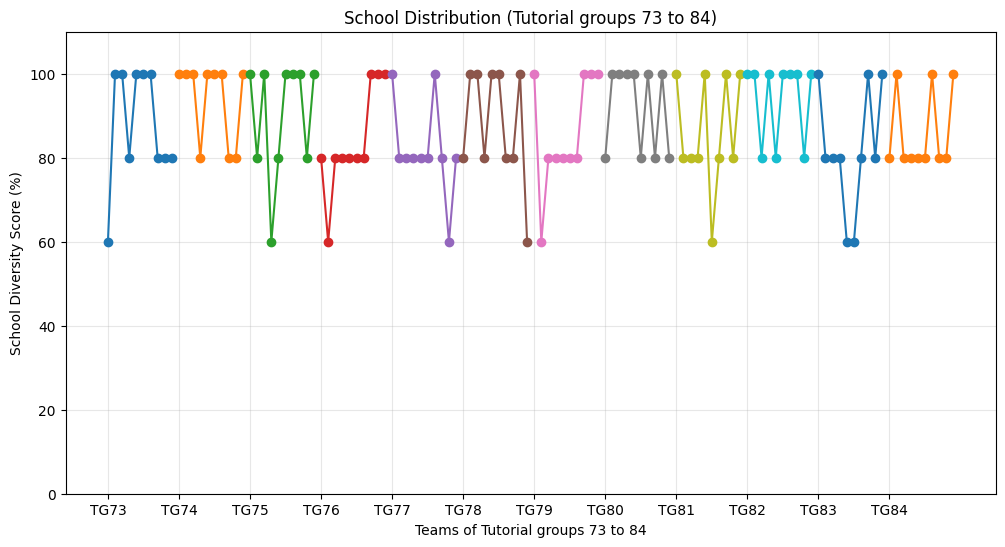

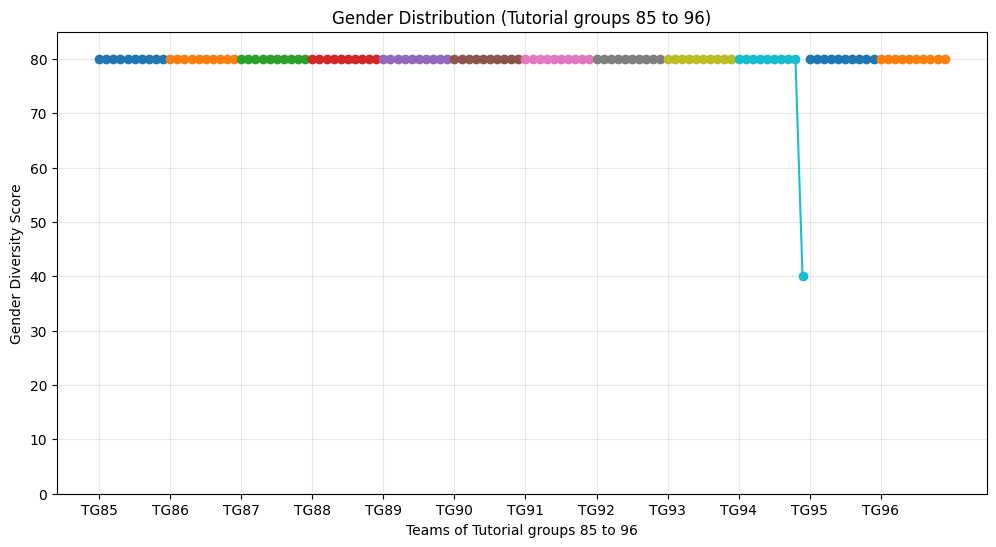

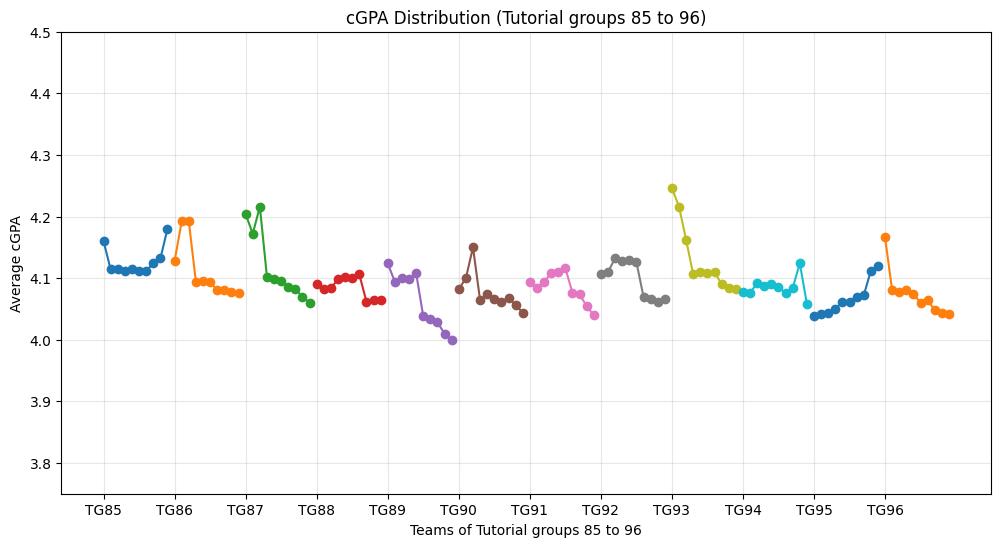

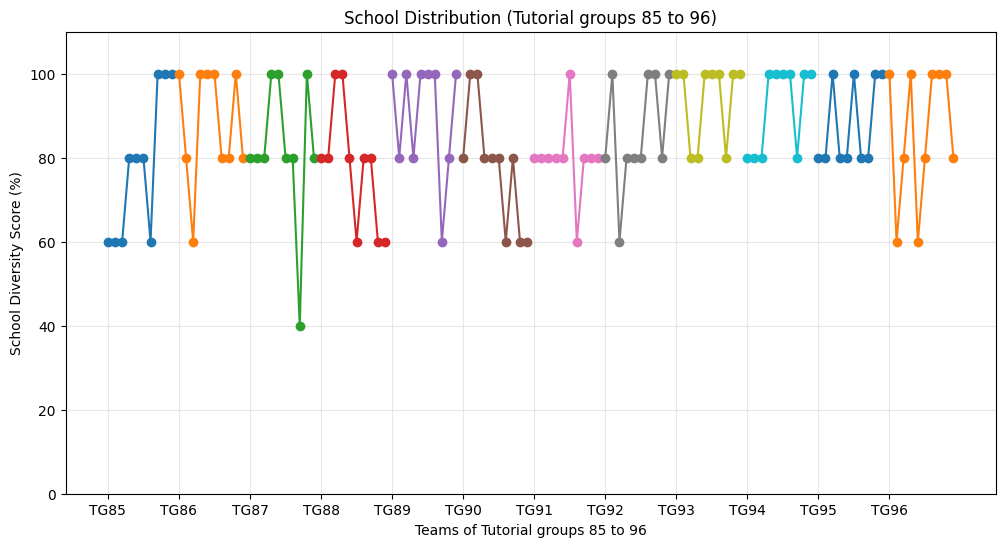

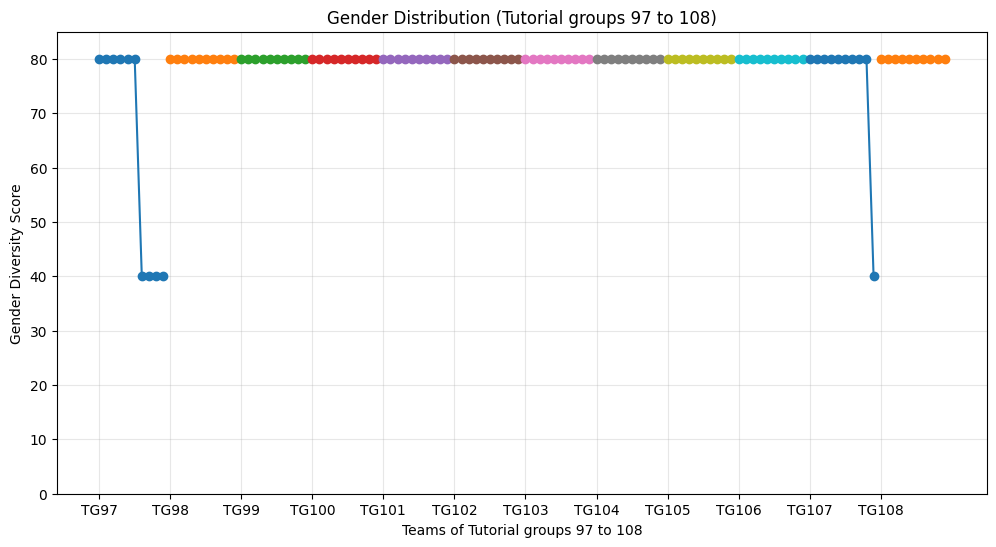

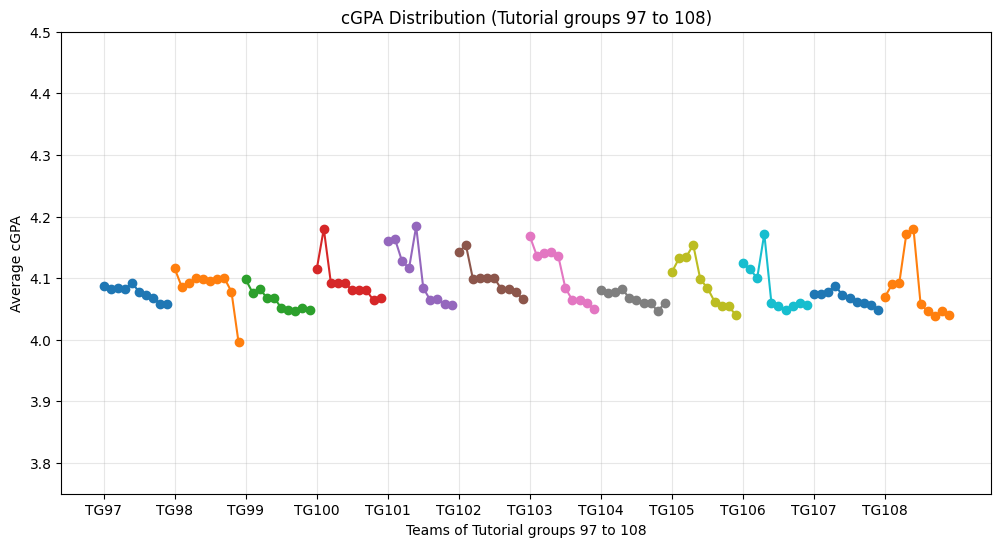

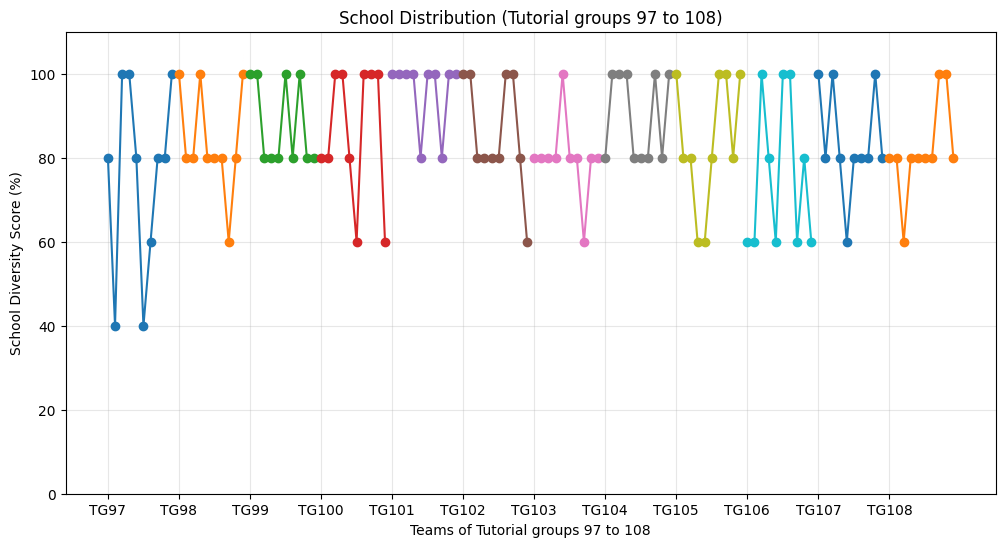

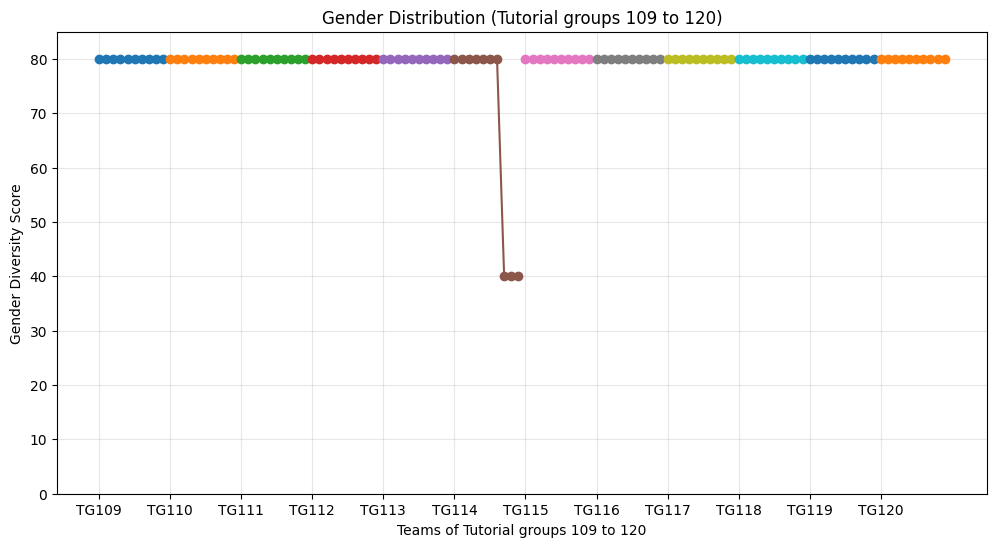

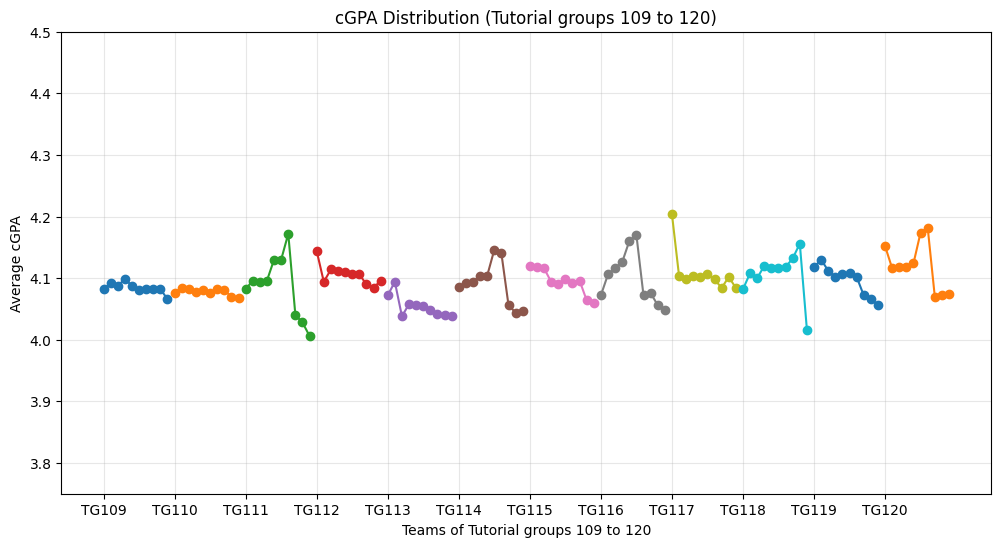

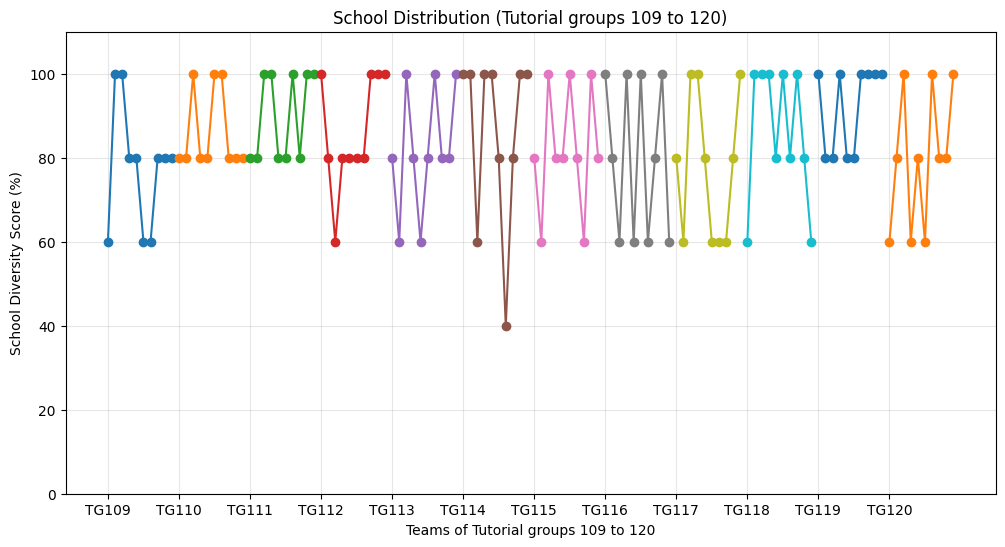

In [ ]:
# Visualistion: Final

# USE THIS
import csv
recordsFile=open("records.csv","r")
team_size = 5
count = 0 # Initialize counter for row processing and temporary list for row data
detailList = []
tutList = [[] for i in range(120)] # tutList is a list containing 120 lists representing 120 tutorial groups

# Process each row in the CSV file
for row in recordsFile:
    if count == 0:  # Skip the header row
        count += 1
        continue

    row = row.strip()  # Remove '\n'
    detailList = row.split(",") # Placeholder list containing all the information of a student as its elements

    tut = int(detailList[0].split('-')[1]) - 1
    # Determine the tutorial group index (ranging from G-1 to G-120)
    # Convert 'G-1' to 0, 'G-2' to 1, etc.
    # This is done by splitting the string 'G-1' to a list containing 2 elements, G and 1
    # Then, we take the second element and subtract 1 from that

    # Append the student details to the appropriate tutorial group
    tutList[tut].append({
        "Tutorial Group": detailList[0],
        "Student ID": detailList[1],
        "School": detailList[2],
        "Name": detailList[3],
        "Gender": detailList[4],
        "CGPA": float(detailList[5])  # Convert CGPA to float for numerical operations
    })
    # tutList now contains the details of all 6000 students, split into 120 sub-lists representing 120 tutorial groups

    count += 1
    if count > 6000:  # Stop after processing 6000 rows (all 6000 students)
        break

print("Information extracted from csv file")

def sort_by_cgpa(student_list):
    # Sort students by CGPA using bubble sort
    # input student_list, which is a list of dictionaries, each representing a student with their details
    n = len(student_list) # Get the total number of students
    for i in range(n):
        for j in range(0, n-i-1): # Iterating over the portion of the list that is unsorted only
            if student_list[j]["CGPA"] > student_list[j+1]["CGPA"]:
                student_list[j], student_list[j+1] = student_list[j+1], student_list[j]
            # Compare each student to the next one. If the current student has a higher CGPA than the next one, swap them
    # We get a list sorted in ascending order of CGPA, with the highest cGPA student at the end of the list

def sorting(tut):
    # Main function that organizes students into teams
    # Input: tutorial group and its number
    # Output: list of balanced teams
    # Separate students by gender and sort by cGPA

    # Create separate lists for male and female students
    males = []
    females = []
    for student in tut: # Append the student dictionary to males list if the student is male, or to the females list if the student is female
        if student["Gender"] == "Male":
            males.append(student)
        else:
            females.append(student)

    # Sort both gender lists by CGPA in ascending order
    sort_by_cgpa(males)
    sort_by_cgpa(females)

    # Initialize the teams list, containing 10 lists within it, each representing a single team
    teams = [[] for i in range(10)]

    # First distribution: Alternate between males and females
    current_team = 0
    while males or females:
      # Continue while either gender list has students
      # If no student of desired genders left, assign the other gender
        if len(teams[current_team]) < 5:  # Check whether current team is full
            if len(teams[current_team]) % 2 == 0 and males:  # Loop through each team, alternating between males (even index) and females (odd index)
                male_student = males.pop(0)
                teams[current_team].append(male_student)  # Append the lowest CGPA male student into the current team
            elif females:
            # If there are still females unassigned a team
                female_student = females.pop(-1)
                teams[current_team].append(female_student) # Append the highest CGPA female student into the current team
            elif males:
            # If no females left, append male students
                male_student = males.pop(0)
                teams[current_team].append(male_student)

        current_team = (current_team + 1) % 10
        # This line ensures that the possible index of the current team is restricted to 0-9.
        # Each iteration of the loop modifies a different team, from 0-9, and then goes back to the first team (index 0)

    # Check and fix school diversity issues in each team
    for i in range(len(teams)):
    # Run this entire loop for each team in the tutorial group
        if len(teams[i]) == 5:  # Only process full teams
            # Get current team stats
            # Count frequency of each school in current team
            schools = {} # Create an empty dictionary names schools, and store the schools mentioned in a specific team
            for student in teams[i]:
                school = student["School"]
                if school in schools:
                    schools[school] += 1 # The school in question is the key, while the number of times the school appears in the team is the value
                else:
                    schools[school] = 1

            # Check each school for over-representation (more than 2 students)
            # Aim to achieve school diversity
            for school in schools:
                if schools[school] > 4: # Only run the following code if duplicate schools are found within a team
                    # Try to swap with students from other teams
                    for j in range(len(teams)):
                        if i != j and len(teams[j]) == 5: # Find a different team which has 5 members
                            # Count schools in other team
                            other_schools = {}
                            for other_student in teams[j]:
                                other_school = other_student["School"]
                                if other_school in other_schools:
                                    other_schools[other_school] += 1
                                else:
                                    other_schools[other_school] = 1

                            # Look for student to swap
                            student_index = 0
                            while student_index < len(teams[i]):
                                student1 = teams[i][student_index]  # Student1 is set to the student at student_index in the team (team i)
                                if student1["School"] == school:  # Checks if student1's school is a duplicated school, ie. the school we are trying to swap out
                                    other_index = 0
                                    while other_index < len(teams[j]):
                                        student2 = teams[j][other_index]  # Student2 is set to the student at other_index in the other team (team j)
                                        if (student2["School"] != school and  # If the school of student2 is not the duplicated school
                                            student2["School"] not in schools and # and if student2's school is not in any of the schools of the students in team i
                                            student2["Gender"] == student1["Gender"]): # and if student2 is of the same gender as student1
                                                 # Since we want the swapped student to have the same gender, retaining gender diversity
                                            # Perform swap
                                            temp = teams[i][student_index]
                                            teams[i][student_index] = teams[j][other_index]
                                            teams[j][other_index] = temp
                                            break
                                            # Break out of the inner while loop, moving on to the line which adds 1 to the student_index
                                        other_index += 1  # Find another student in team j
                                student_index += 1 # Check other students in team i if his/her school is a duplicated school in the team
                            break # breaks out of the for j in range(len(teams)) loop to stop further trying to find possible swaps
                            # In the worst case, once all iterations of other_index and student_index are carried out,
                            # and if no student is found in team j which meets our 3 criteria above, no swap will be performed (retains diversity of gender and cGPA)
    team_num = 1

    # Assign sequential team numbers to each team
    for team in teams:     # Iterate through each team in the tutorial group
        for student in team:
            student["Team Assigned"] = team_num   # Assign team numbers
        team_num += 1

    return teams

def save_all_tutorial_groups_to_csv(tutList):
    # Create new CSV file in write mode with UTF-8 encoding
    with open('team_assignments.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write header row with column names
        writer.writerow([
            'Tutorial Group',
            'Student ID',
            'Name',
            'School',
            'Gender',
            'CGPA',
            'Team Assigned'
        ])

        # Process each tutorial group
        tutorial_group_number = 1
        for tut in tutList:
        # As mentioned at the start, tutList contains 120 lists, each representing a tutorial group
        # tut represents the list of 50 dictionaries (students) in a single tutorial group and all their details
            teams = sorting(tut)
            # Sort students into teams within current tutorial group
            # Run the sorting function, taking tut as the parameter

            # Write each student's data (including their team assgined) to CSV
            for team in teams:
                for student in team:
                    writer.writerow([
                        str(student.get('Tutorial Group')),
                        str(student.get('Student ID')),
                        str(student.get('Name')),
                        str(student.get('School')),
                        str(student.get('Gender')),
                        str(student.get('CGPA')),
                        str(student.get('Team Assigned'))
                    ])
            tutorial_group_number += 1

save_all_tutorial_groups_to_csv(tutList)
# tutList contains all tutorial groups

print('Sorting complete')


import matplotlib.pyplot as plt
# Import matplotlib library to plot graphs

# Function to visualize the diversity metrics (gender, cGPA, and school) for all teams in all tutorial groups
def visualize_diversity(all_tutorial_data):

    # Creation of Summary graphs
    # Gender Distribution Summary Graph
    plt.figure(figsize=(12, 6))
        # Set up a new graph figure for the gender distribution summary graph with specified dimensions
    x_values = []
        # List of x-axis labels for each team in the tutorial group for gender distribution graphs

    # Loop through all tutorial groups in all_tutorial_data
    for tut_idx in range(len(all_tutorial_data)):
        tutorial = all_tutorial_data[tut_idx]
            # Current tutorial group
        gender_scores = []
            # List to store gender diversity score for each team in the current tutorial group

        # Loop through each team in the tutorial group
        for team_idx in range(len(tutorial)):
            team = tutorial[team_idx]
               # Current team within the tutorial group
            total_males = 0
                # Counter for the male students in the team
            total_students = 0
                 # Counter for all students in the team

            # Loop through each student in the team to calculate gender diversity ratio
            for student in team:
                if student["Gender"] == "Male":
                    # Check if student is male
                    total_males += 1
                        # Increase total male count by 1 if condition is true (student is male)
                total_students += 1
                    # Increase total student count by 1 for each student

            # Calculating gender diversity score (only when there are students in a team)
            if total_students > 0:
                male_ratio = total_males / total_students
                        # Calculate male ratio in the team
                        # A perfectly balanced team will have a male_ratio of 0.5
                gender_score = 100 - abs(0.5 - male_ratio) * 200
                    # Calculate the gender diversity score
                    # The higher the score, the more gender balanced the team is
                    # When score is 100, means 50 male - 50 female ratio in a team (ideal situation)
                        # abs(0.5 - male_ratio) calculates the absolute deviation of male_ratio from ideal 0.5
                        # *200 to scale the devation value to be between 0-100 (deviation of 0 is ideal)
                        # Take 100 - abs(0.5 - male_ratio) * 200 to make the perfect score 100
                gender_scores.append(gender_score)
                    # Append the score to the list that stores gender diversity scores for the current tutorial group

            # Label each segment of x-axis using tutorial group number
            x_values.append(f"TG{tut_idx + 1}")

        # Plot the summary line graph for gender diversity score line for each tutorial group separately
        plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), gender_scores, marker='o')

    # Formatting the gender distribution summary line graph
    plt.title("Overall Gender Distribution Across All Tutorial Groups")
        # Set the title of line graph for the gender distribution summary graph
    plt.xlabel("Teams in Each Tutorial Group")
        # Label x-axis
    plt.ylabel("Gender Diversity Score")
        # Label y-axis
    plt.ylim(0, 85)
        # Show the full y-axis from 0 to 85
    plt.xticks(rotation=0, ticks=range(0, len(x_values), 10), labels=[x_values[i] for i in range(0, len(x_values), 10)])
        # Make sure x-axis labels are horizontal for easier graph reading
    plt.grid(True, alpha=0.3)
        # Add gridlines so the positions of the points of each team on the graph is easier to read
    plt.show()
        # Display the gender distribution summary graph

    # cGPA Distribution Summary Graph
    plt.figure(figsize=(12, 6))
        # Set up a new graph figure for the cGPA distribution summary graph with specified dimensions
    x_values = []
        # Reset list of x-axis labels for each team in the tutorial group for the cGPA distribution graphs

    # Loop through all tutorial groups in all_tutorial_data
    for tut_idx in range(len(all_tutorial_data)):
        tutorial = all_tutorial_data[tut_idx]
            # Current tutorial group
        cgpa_averages = []
            # List to store average cGPA values for each team in the current tutorial group

        # Loop through each team in the tutorial group
        for team_idx in range(len(tutorial)):
            team = tutorial[team_idx]
                # Current team within the tutorial group
            cgpas = [student["CGPA"] for student in team]
                # Collect the cGPA values of each student in the team of the current tutorial group

            # Calculating average cGPA (only if the team has students)
            if cgpas:
                average_cgpa = sum(cgpas) / len(cgpas)
                    # Calculate the average cGPA values for the team of the current tutorial group
                cgpa_averages.append(average_cgpa)
                    # Append cGPA average values to the list that stores average cGPA values for the current tutorial group

            # Label each segment of x-axis using tutorial group number
            x_values.append(f"TG{tut_idx + 1}")

        # Plot the summary line graph for average cGPA of each team for each tutoriial group separately
        plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), cgpa_averages, marker='o')

    # Formattiing of the cGPA distribution summary line graph
    plt.title("Overall cGPA Distribution Across All Tutorial Groups")
        # Set title of the line graph for cGPA distribution summary graph
    plt.xlabel("Teams in Each Tutorial Group")
        # Label x-axis
    plt.ylabel("Average cGPA")
        # Label y-axis
    plt.ylim(3.75, 4.50)
        # Show reasonable y-axis scale for cGPA from 3.75 to 4.50
    plt.xticks(rotation=0, ticks=range(0, len(x_values), 10), labels=[x_values[i] for i in range(0, len(x_values), 10)])
        # Make sure x-axis labels are horizontal for easier graph reading
    plt.grid(True, alpha=0.3)
        # Add gridlines so the positions of the points of each team on the graph is easier to read
    plt.show()
        # Display the cGPA distribution summary graph

    # School Distribution Summary Graph
    plt.figure(figsize=(12, 6))
        # Set up a new figure for the school diversity summary graph with specified dimensions
    x_values = []
        # Reset list of x-axis labels for each team in the tutorial group for the school distribution graphs

    # Loop through all tutorial groups in all_tutorial_data
    for tut_idx in range(len(all_tutorial_data)):
        tutorial = all_tutorial_data[tut_idx]
            # Current tutorial group
        school_scores = []
            # List to store school diversity scores for each team in the current tutorial group

        # Loop through each team in the tutorial group
        for team_idx in range(len(tutorial)):
            team = tutorial[team_idx]
                # Current team within the tutorial group
            unique_schools = set()
                # Set to track all the unique schools in the team
            total_students = 0
                # Counter for all students in the team

            # Loop through each student in the team
            for student in team:
                unique_schools.add(student["School"])
                    # Add the student's school to the set of unique schools
                total_students += 1
                    # Increase total student count by 1 for each student

            # Calculate school diversity score (only when there are students in a team)
            if total_students > 0:
                school_score = (len(unique_schools) / total_students) * 100
                    # Calculate the school diversity score based on the number of unique schools in each team of a tutorial group
                    # Divide number of unqiue schhools by total number of students, scaled to 100%
                school_scores.append(school_score)
                    # Append the scores to the list that stores school diversity scores for the current tutorial group

            # Label each segment of x-axis using the tutorial group number
            x_values.append(f"TG{tut_idx + 1}")

        # Plot the summary line graph for school diversity scores of each team for each tutorial group separately
        plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), school_scores, marker='o')

    # Foramtting of the school distribution summary line graph
    plt.title("Overall School Diversity Across All Tutorial Groups")
        # Set title of the line graph for school distribution summary graph
    plt.xlabel("Teams in Each Tutorial Group")
        # Label x-axis
    plt.ylabel("School Diversity Score (%)")
        # Label y-axis
    plt.ylim(0, 110)
        # Show the full y-axis from 0 to 100
    plt.xticks(rotation=0, ticks=range(0, len(x_values), 10), labels=[x_values[i] for i in range(0, len(x_values), 10)])
        # Make sure x-axis labels are horizontal for easier graph reading
    plt.grid(True, alpha=0.3)
        # Add gridlines so the positions of the points of each team on the graph is easier to read
    plt.show()
        # Display the school distribution summary graph

    # Creation of individual line graphs in batches of 12 tutorial groups
    # 30 graphs in total: 10 for gender, cGPA and school respectively
    num_tutorials = len(all_tutorial_data)
        # Get the total number of tutorial groups

    # Process the data for every 12 tutorial groups to create graphs in batches of 12
    for batch_start in range(0, num_tutorials, 12):
        batch_end = min(batch_start + 12, num_tutorials)
            # Set the end of each batch, ensuring it doesn't exceed either batch_start + 12 or num_tutorials
        batch_tutorials = all_tutorial_data[batch_start:batch_end]
            # Stores a list of up to 12 tutorial groups for each graph

        # Set tutorial range variables for graph titles
        x = batch_start + 1
            # The starting tutorial group number in the graph
        y = batch_end
            # The last tutorial group in the graph

        # Gender Distribution Graphs
        plt.figure(figsize=(12, 6))
            # Set up a new graph figure for gender with specified dimensions
        x_values = []
            # List of x-axis labels for each team in the tutorial group for gender distribution graphs

        # Loop through each tutorial group in the 12 tutorial batch
        for tut_idx in range(len(batch_tutorials)):
            tutorial = batch_tutorials[tut_idx]
                # Current tutorial group
            gender_scores = []
                # List to store gender diversity score for each team in the current tutorial group

            # Loop through each team in the tutorial group
            for team_idx in range(len(tutorial)):
                team = tutorial[team_idx]
                    # Current team within the tutorial group
                total_males = 0
                    # Counter for the male students in the team
                total_students = 0
                    # Counter for all students in the team

                # Loop through each student in the team to calculate gender ratio
                for student in team:
                    if student["Gender"] == "Male":
                        # Check if student is male
                        total_males += 1
                            # Increase total male count by 1 if condition is true (student is male)
                    total_students += 1
                        # Increase total student count by 1 for each student

                # Calculating gender diversity score (only when there are students in a team)
                if total_students > 0:
                    male_ratio = total_males / total_students
                        # Calculate male ratio in the team
                        # A perfectly balanced team will have a male_ratio of 0.5
                    gender_score = 100 - abs(0.5 - male_ratio) * 200
                        # Calculate the gender diversity score
                        # The higher the score, the more gender balanced the team is
                        # When score is 100, means 50 male - 50 female ratio in a team (ideal situation)
                            # abs(0.5 - male_ratio) calculates the absolute deviation of male_ratio from ideal 0.5
                            # *200 to scale the devation value to be between 0-100 (deviation of 0 is ideal)
                            # Take 100 - abs(0.5 - male_ratio) * 200 to make the perfect score 100
                    gender_scores.append(gender_score)
                        # Append the score to the list that stores gender diversity scores for the current tutorial group

                # Label each segement of x-axis using tutorial group number
                x_values.append(f"TG{batch_start + tut_idx + 1}")

            # Plot the line graph for gender diversity score line for each tutorial group separately
            plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), gender_scores, marker='o')

        # Formatting of the gender distribution tutorial batch line graph
        plt.title("Gender Distribution (Tutorial groups {} to {})".format(x, y))
            # Set title of the line grah with range of tutorial groups included in each batch
        plt.xlabel("Teams of Tutorial groups {} to {}".format(x, y))
            # Label x-axis
        plt.ylabel("Gender Diversity Score")
            # Label y-axis
        plt.ylim(0, 85)
            # Show the full y-axis from 0 to 85
        plt.xticks(rotation=0, ticks=range(0, len(x_values), 10), labels=[x_values[i] for i in range(0, len(x_values), 10)])
            # Make sure x-axis labels are horizontal for easier graph reading
        plt.grid(True, alpha=0.3)
            # Add gridlines so the positions of the points of each team on the graph is easier to read
        plt.show()
            # Display the gender distribution graph

        # cGPA Distribution Graphs
        plt.figure(figsize=(12, 6))  # Set up a new graph figure for cGPA with specified dimensions
        x_values = []
            # Reset list of x-axis labels for each team in the tutorial group for the cGPA distribution graphs

        # Loop through each tutorial group in the 12 tutorial batch
        for tut_idx in range(len(batch_tutorials)):
            tutorial = batch_tutorials[tut_idx]
                # Current tutorial group
            cgpa_averages = []
                # List to store average cGPA values for each team in the current tutorial group

            # Loop through each team in the tutorial group
            for team_idx in range(len(tutorial)):
                team = tutorial[team_idx]
                    # Current team within the tutorial group
                cgpas = [student["CGPA"] for student in team]
                    # Collect the cGPA values of each student in the team of the current tutorial group

                # Calculating average cGPA (only if the team has students)
                if cgpas:
                    average_cgpa = sum(cgpas) / len(cgpas)
                        # Calculate average cGPA values for the team of the current tutorial group
                    cgpa_averages.append(average_cgpa)
                        # Append cGPA average values to the list that stores average cGPA values for the current tutorial group

                # Label each segement of x-axis using tutorial group number
                x_values.append(f"TG{batch_start + tut_idx + 1}")

            # Plot the line graph for avarege cGPA of each team for each tutorial group separately
            plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), cgpa_averages, marker='o')

        # Formatting of the cGPA distribution tutorial batch line graph
        plt.title("cGPA Distribution (Tutorial groups {} to {})".format(x, y))
            # Set title of the line graph with range of tutorial groups included in each batch
        plt.xlabel("Teams of Tutorial groups {} to {}".format(x, y))
            # Label x-axis
        plt.ylabel("Average cGPA")
            # Label y-axis
        plt.ylim(3.75, 4.50)
            # Show reasonable y-axis scale for cGPA from 3.75 to 4.50
        plt.xticks(rotation=0, ticks=range(0, len(x_values), 10), labels=[x_values[i] for i in range(0, len(x_values), 10)])
            # Make sure x-axis labels are horizontal for easier graph reading
        plt.grid(True, alpha=0.3)
            # Add gridlines so the positions of the points of each team on the graph is easier to read
        plt.show()
            # Display the cGPA distribution graph

        # School distribution graph
        plt.figure(figsize=(12, 6))  # Set up a new graph figure for schools with specifed dimensions
        x_values = []
            # Reset list of x-axis labels for each team in the tutorial group for the school distribution graphs

        # Loop through each tutorial group in the 12 tutorial batch
        for tut_idx in range(len(batch_tutorials)):
            tutorial = batch_tutorials[tut_idx]
                # Current tutorial group
            school_scores = []
                # List to store school diversity scores for each team in the current tutorial group

            # Loop through each team in the tutorial group
            for team_idx in range(len(tutorial)):
                team = tutorial[team_idx]
                    # Current team within the tutorial group
                unique_schools = set()
                    # Set to track all the unique schools in the team
                total_students = 0
                    # Counter for all students in the team

                # Loop through each student in the team
                for student in team:
                    unique_schools.add(student["School"])
                        # Add student's school to the set of unique schools
                    total_students += 1
                        # Increase total student count by 1 for each student

                # Calculate school diversity score (only when there are students in a team)
                if total_students > 0:
                    school_score = (len(unique_schools) / total_students) * 100
                    # Calculate the school diversity score based on the number of unique schools in each team of a tutorial group
                    # Divide number of unqiue schhools by total number of students, scaled to 100%
                    school_scores.append(school_score)
                        # Append the scores to the list that stores school diversity scores for the current tutorial group

                # Label each segement of x-axis using tutorial group number
                x_values.append(f"TG{batch_start + tut_idx + 1}")

            # Plot the line graph for school diversity scores of each team for each tutorial group separately
            # Without legend
            plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), school_scores, marker='o')

                # With legend of which coloured line represents whic tutorial group
                # plt.plot(range(tut_idx * 10, tut_idx * 10 + 10), school_scores, label=f"Tutorial {batch_start + tut_idx + 1}", marker='o')

        # Formatting of the school distribution tutorial batch line graph
        plt.title("School Distribution (Tutorial groups {} to {})".format(x, y))
            # Set title of the line grah with range of tutorial groups included in each batch
        plt.xlabel("Teams of Tutorial groups {} to {}".format(x, y))
            # Label x-axis
        plt.ylabel("School Diversity Score (%)")
            # Label y-axis
        plt.ylim(0, 110)
            # Show the full y-axis from 0 to 100
        plt.xticks(rotation=0, ticks=range(0, len(x_values), 10), labels=[x_values[i] for i in range(0, len(x_values), 10)])
            # Make sure x-axis labels are horizontal for easier graph reading
        plt.grid(True, alpha=0.3)
            # Add gridlines so the positions of the points of each team on the graph is easier to read
        plt.show()
            # Display the school distribution graph

            # With legend
            # plt.legend(loc='upper right')  # Show legend

teams_by_tutorial = []
    # List containing all teams in all tutorial groups

# Form a complete list of teams of all tutorials
for tut_idx in range(len(tutList)):
    teams = sorting(tutList[tut_idx])
        # Formed teams for each tutorial group
    teams_by_tutorial.append(teams)
        # Appends the formed teams to the list containing all teams in all tutorial groups

# Create the graphs for all teams of all tutorial groups
visualize_diversity(teams_by_tutorial)


In [ ]:
# Code for 4-10 here
import csv
recordsFile=open("records.csv","r")
team_size = 0
while team_size < 4 or team_size > 10:
  input_group_size = input("Please enter the selected group size (4 to 10): ")
  try:
    team_size = int(input_group_size) #see if the input value is indeed an integer
  except ValueError:
    print("Invalid input. Please try again")
    team_size = 0 #return group_size=0 if the input is invalid eg. a string

count = 0
detailList = []
tutList = [[] for i in range(120)] # tutList is a list containing 120 lists representing 120 tutorial groups

for row in recordsFile:
    if count == 0:  # Skip the header row
        count += 1
        continue

    row = row.strip()  # Remove '\n'
    detailList = row.split(",") # Placeholder list containing all the information of a student as its elements

    tut = int(detailList[0].split('-')[1]) - 1

    # Append the student details to the appropriate tutorial group
    tutList[tut].append({
        "Tutorial Group": detailList[0],
        "Student ID": detailList[1],
        "School": detailList[2],
        "Name": detailList[3],
        "Gender": detailList[4],
        "CGPA": float(detailList[5])  # Convert CGPA to float for numerical operations
    })
    # tutList now contains the details of all 6000 students, split into 120 sub-lists representing 120 tutorial groups

    count += 1
    if count > 6000:  # Stop after processing 6000 rows (all 6000 students)
        break

def sort_by_cgpa(student_list):
    # Sort students by CGPA using bubble sort
    # input student_list, which is a list of dictionaries, each representing a student with their details
    n = len(student_list) # Get the number of students
    for i in range(n):
        for j in range(0, n-i-1): # Iterating over the portion of the list that is unsorted only
            if student_list[j]["CGPA"] > student_list[j+1]["CGPA"]:
                student_list[j], student_list[j+1] = student_list[j+1], student_list[j]
            # Compare each student to the next one. If the current student has a higher CGPA than the next one, swap them
    # We get a list sorted in ascending order of CGPA, with the highest cGPA student at the end of the list

def sorting(tut):
    # Main function that organizes students into teams
    # Input: tutorial group and its number
    # Output: list of balanced teams
    # Separate students by gender and sort by cGPA
    males = []
    females = []
    for student in tut: # Append the student dictionary to males list if the student is male, or females list if the student is female
        if student["Gender"] == "Male":
            males.append(student)
        else:
            females.append(student)

    sort_by_cgpa(males)
    sort_by_cgpa(females)
    # Sort both gender lists by cGPA

    num_of_teams = 50//team_size
    teams = [[] for i in range(num_of_teams)] # Initialize the teams list, containing num_of_teams = (50//team_size) lists within it, each representing a single team
                                   # for example, if team_size = 6, the teams list would contain 8 lists (8 teams)

    # First distribution: Alternate between males and females
    current_team = 0
    while males or females: # Runs while either list still contains students
      # If no student of desired genders left, assign the other gender
      # IMPORTANT: we removed if len(teams[current_team]) < 5 as a condition, since for other group sizes, there will usually be a remainder
      # These remaining students will still continue to be added according to the conditions below, despite the team size exceeding the desired team size input by the user
        if len(teams[current_team]) % 2 == 0 and males: # Loop through each team, alternating between males (even index) and females (odd index)
            male_student = males.pop(0)
            teams[current_team].append(male_student) # Append the lowest CGPA male student into the current team
        elif females: # If there are still females unassigned a team, or there are no males left
            female_student = females.pop(-1)
            teams[current_team].append(female_student) # Append the highest CGPA female student into the current team
        elif males:  # If no females left, append males
            male_student = males.pop(0)
            teams[current_team].append(male_student)

        current_team = (current_team + 1) % num_of_teams
        # This line ensures that the possible index of the current team is restricted to 0-n.
        # Each iteration of the loop modifies a different team, from 0-n, and then goes back to the first team (index 0)

    for i in range(len(teams)): # Run this entire loop for each team in the tutorial group
        if len(teams[i]) == team_size:  # Only process full teams
            # Get current team stats
            schools = {} # Create an empty dictionary names schools, and store the schools mentioned in a specific team
            for student in teams[i]:
                school = student["School"]
                if school in schools:
                    schools[school] += 1 # The school in question is the key, while the number of times the school appears in the team is the value
                else:
                    schools[school] = 1

            # Find schools with more than 2 students
            # Aim to achieve school diversity
            for school in schools:
                if schools[school] > 2: # Only run the following code if duplicate schools are found within a team
                    # Try to swap with other teams
                    for j in range(len(teams)):
                        if i != j and len(teams[j]) == team_size: # Find a different team which has full members (team_size)
                            # Get other team's schools, and how many times each school appears in that team
                            other_schools = {}
                            for other_student in teams[j]:
                                other_school = other_student["School"]
                                if other_school in other_schools:
                                    other_schools[other_school] += 1
                                else:
                                    other_schools[other_school] = 1

                            # Look for student to swap
                            student_index = 0
                            while student_index < len(teams[i]):
                                student1 = teams[i][student_index] # student1 is set to the student at student_index in the team (team i)
                                if student1["School"] == school: # Checks if student1's school is a duplicated school, ie. the school we are trying to swap out
                                    other_index = 0
                                    while other_index < len(teams[j]):
                                        student2 = teams[j][other_index] # student2 is set to the student at other_index in the other team (team j)
                                        if (student2["School"] != school and # if the school of student2 is not the duplicated school
                                            student2["School"] not in schools and # and if student2's school is not in any of the schools of the students in team i
                                            student2["Gender"] == student1["Gender"]): # and if student2 is of the same gender as student1
                                                                                       # Since we want the swapped student to have the same gender, retaining gender diversity
                                            # Perform swap
                                            temp = teams[i][student_index]
                                            teams[i][student_index] = teams[j][other_index]
                                            teams[j][other_index] = temp
                                            break # break out of the inner while loop, moving on to the line which adds 1 to the student_index
                                        other_index += 1 # find another student in team j
                                student_index += 1 # Check other students in team i if his/her school is a duplicated school in the team
                            break # breaks out of the for j in range(len(teams)) loop to stop further trying to find possible swaps
                            # In the worst case, once all iterations of other_index and student_index are carried out,
                            # and if no student is found in team j which meets our 3 criteria above, no swap will be performed
    team_num = 1
    for team in teams:     # Iterate through each team in the tutorial group
        for student in team:
            student["Team Assigned"] = team_num     # Assign team numbers
        team_num += 1

    return teams

def save_all_tutorial_groups_to_csv(tutList):
    with open('team_assignments.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write header
        writer.writerow([
            'Tutorial Group',
            'Student ID',
            'Name',
            'School',
            'Gender',
            'CGPA',
            'Team Assigned'
        ])

        # Process each tutorial group
        tutorial_group_number = 1
        for tut in tutList:   # As mentioned at the start, tutList contains 120 lists, each representing a tutorial group
                              # tut represents the list of 50 dictionaries (students) in a single tutorial group and all their details
            teams = sorting(tut)   # Run the sorting function, taking tut as the parameter

            # Write team assignments
            for team in teams:
                for student in team:
                    writer.writerow([
                        str(student.get('Tutorial Group')),
                        str(student.get('Student ID')),
                        str(student.get('Name')),
                        str(student.get('School')),
                        str(student.get('Gender')),
                        str(student.get('CGPA')),
                        str(student.get('Team Assigned'))
                    ])
            tutorial_group_number += 1

save_all_tutorial_groups_to_csv(tutList)
# tutList contains all tutorial groups

print('Sorting complete')

Please enter the selected group size (4 to 10): 7
Sorting complete


The above creates a dictionary called 'tut' which contains the data of all 50 people in "G-1" Tutorial Group and organises the data using keys and values.

Also, detailList was a temporary placeholder list we used to append to tut.


In [ ]:
def function1(tut):
    males = 0
    females = 0
    tutMales = []
    tutFemales = []

    # Count and categorize by gender
    for i in range(50):
        if tut[i]["Gender"] == "Male":
            males += 1
            tutMales.append(tut[i])
        else:
            females += 1
            tutFemales.append(tut[i])

    print(f"In this Tutorial Group, Males: {males}, Females: {females}")

    list_males = []
    list_females = []
    CGPAlist_males = []
    CGPAlist_females = []

    def lookAtKey_CGPA(dictionary):
        return dictionary["CGPA"]

    for i in range(males):
        CGPAlist_males.append(tutMales[i]["CGPA"])
        CGPAlist_males.sort()

    for i in range(females):
        CGPAlist_females.append(tutFemales[i]["CGPA"])
        CGPAlist_females.sort()

    tutMales.sort(key=lookAtKey_CGPA)
    tutFemales.sort(key=lookAtKey_CGPA)

    # Ensure independent initialization of fullList
    fullList = [[] for _ in range(10)]
    print(fullList)

    try:
        for i in range(25):
            if i % 2 != 0:
                if len(tutFemales) > 0 and len(tutMales) > 0:
                    fullList[i].append(tutFemales[0])
                    tutFemales.pop(0)
                    fullList[i].append(tutMales[-1])
                    tutMales.pop(-1)
            else:
                if len(tutFemales) > 0 and len(tutMales) > 0:
                    fullList[i].append(tutFemales[-1])
                    tutFemales.pop(-1)
                    fullList[i].append(tutMales[0])
                    tutMales.pop(0)

    except IndexError:
        tutMales.extend(tutFemales)
        while len(tutMales) > 0:
            for i in range(10):
                if len(fullList[i]) != 5 and len(tutMales) > 0:
                    fullList[i].append(tutMales[0])
                    tutMales.pop(0)

    # Rest of your code handling duplicates, teams_with_4_students, etc.
    print(fullList)

    duplicates = []
    teams_with_4_students = []


    for team in fullList:
      for i in range(len(team)-1):
        for j in range(i+1, len(team)):
          if team[i]["School"] == team[j]["School"]:
            if team[i]["Gender"] == "Female":  #replace female with gender of more students
              duplicates.append(team[i])
              team.remove(team[i])
              teams_with_4_students.append(team)
              fullList.remove(team)
              break
            elif team[j]["Gender"] == "Female":   #replace female with gender of more students
              duplicates.append(team[j])
              team.remove(team[j])
              teams_with_4_students.append(team)
              fullList.remove(team)
              break
            else:
              duplicates.append(team[i])
              team.remove(team[i])
              teams_with_4_students.append(team)
              fullList.remove(team)
              break
    print(fullList)
    print(teams_with_4_students)
    print(duplicates)

    i = 0
    while i < len(duplicates):
        duplicate_student = duplicates[i]
        added_to_team = False  # Flag to check if the student was added
        for team in teams_with_4_students:
            unique_school = True  # Assume the school is unique initially

            # Check if duplicate_student's school already exists in the team
            for student in team:
                if duplicate_student["School"] == student["School"]:
                    unique_school = False  # School is not unique
                    break  # Exit loop if a match is found

            if unique_school:
                team.append(duplicate_student)  # Add to team
                added_to_team = True  # Mark as added

                # Remove team if it's now full
                if len(team) == 5:
                    fullList.append(team)
                    teams_with_4_students.remove(team)
                break  # Exit loop after adding

        if added_to_team:
            duplicates.pop(i)  # Remove duplicate_student from duplicates immediately
        else:
            i += 1  # If not added to a team, move to the next duplicate


    while len(duplicates) > 0:
      for team in teams_with_4_students:
        team.append(duplicates[0])
        duplicates.pop(0)
        if len(team) == 5:
          fullList.append(team)
          teams_with_4_students.pop(teams_with_4_students.index(team))

    print(fullList)
    print(teams_with_4_students)
    print(duplicates)

    i = 1
    for team in fullList:
      for student in team:
        student["Team Assigned"] = i
      i += 1

    print(fullList)

# Call function1 on each tutorial group in tutList
for i in range(120):
    function1(tutList[i])

In this Tutorial Group, Males: 21, Females: 29
[[], [], [], [], [], [], [], [], [], []]
[[{'Tutorial Group': 'G-1', 'Student ID': '3861', 'School': 'ASE', 'Name': 'Layla Torres', 'Gender': 'Female', 'CGPA': 4.52, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '1329', 'School': 'NIE', 'Name': 'Nguyen Van Sam', 'Gender': 'Male', 'CGPA': 3.85, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '5002', 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': 'Male', 'CGPA': 4.02, 'Team Assigned': 6}, {'Tutorial Group': 'G-1', 'Student ID': '1417', 'School': 'CoE', 'Name': 'Darren Lee', 'Gender': 'Male', 'CGPA': 4.12, 'Team Assigned': 6}, {'Tutorial Group': 'G-1', 'Student ID': '945', 'School': 'MAE', 'Name': 'Han Li', 'Gender': 'Female', 'CGPA': 4.1, 'Team Assigned': 5}], [{'Tutorial Group': 'G-1', 'Student ID': '2417', 'School': 'SSS', 'Name': 'Truong Minh Chau', 'Gender': 'Female', 'CGPA': 3.88, 'Team Assigned': 10}, {'Tutorial Group': 'G-1', 'Student ID': '5708', 'Scho

ValueError: list.remove(x): x not in list

In [ ]:
  # USE THIS

def function1(tut):
    males = 0
    females = 0
    tutMales = []
    tutFemales = []

    for i in range(50):
      if tut[i]["Gender"] == "Male":
        males += 1
        tutMales.append(tut[i])
      else:
        females += 1
        tutFemales.append(tut[i])

    print(f"In this Tutorial Group, Males: {males}, Females: {females}")

    list_males=[]
    list_females=[]
    CGPAlist_males=[]
    CGPAlist_females=[]

    def lookAtKey_CGPA(dictionary): # see why it works, copied from chatgpt.
      return dictionary["CGPA"]
      # update: chatgpt says other alternatives are lambda or more complicated stuff, so we stick to this
      # so how it works is: we can't use .sort(key="CGPA") right away since dictionaries by nature are NOT ORDERED, so they can't be sorted
      # Specifically, you need to define which key's value in the dictionary should be used as the basis for comparison during sorting.

    for i in range(males):
      CGPAlist_males.append(tutMales[i]["CGPA"])
      CGPAlist_males.sort()

    for i in range(females):
      CGPAlist_females.append(tutFemales[i]["CGPA"])
      CGPAlist_females.sort()

    tutMales.sort(key=lookAtKey_CGPA) # try to come up with a sorting algorithm for this part
    tutFemales.sort(key=lookAtKey_CGPA)

    print(len(tutMales))
    print(len(tutFemales))
    print(tutMales)
    print(tutFemales)
    print(CGPAlist_males)
    print(CGPAlist_females)

    fullList =[[[] for i in range(10)] for j in range(120)] # Creates a list called "fullList" which contains 10 empty lists.
    print(fullList)

    try:
        for i in range(120):
          for j in range(25): #Maybe can have 1 pass first then check if we have enough students for the second run
              if j % 2 != 0: # if j is odd
                  if len(tutFemales) > 0 and len(tutMales) > 0: # If there are still males and females available for selection
                      fullList[i][j].append(tutFemales[0])
                      tutFemales.pop(0)
                      fullList[i][j].append(tutMales[-1])
                      tutMales.pop(-1)
              else: # if j is even
                  if len(tutFemales) > 0 and len(tutMales) > 0:
                      fullList[i][j].append(tutFemales[-1])
                      tutFemales.pop(-1)
                      fullList[i][j].append(tutMales[0])
                      tutMales.pop(0)

    except IndexError: # If IndexError is returned due to attempt to access item outside the index range of the list.
        # Handle cases where one list runs out of students
        tutMales.extend(tutFemales) # To merge leftover students into a single list "tutMales"
        while len(tutMales) > 0:
            for i in range(120):
              for j in range(10):
                if len(fullList[i][j]) != 5 and len(tutMales) > 0:
                    fullList[i][j].append(tutMales[0]) # Appends the leftover students to a team with less than 5 students
                    tutMales.pop(0)

    print(fullList)

    duplicates = []
    teams_with_4_students = []


    for team in fullList:
      for i in range(len(team)-1):
        for j in range(i+1, len(team)):
          if team[i]["School"] == team[j]["School"]:
            if team[i]["Gender"] == "Female":  #replace female with gender of more students
              duplicates.append(team[i])
              team.remove(team[i])
              teams_with_4_students.append(team)
              fullList.remove(team)
              break
            elif team[j]["Gender"] == "Female":   #replace female with gender of more students
              duplicates.append(team[j])
              team.remove(team[j])
              teams_with_4_students.append(team)
              fullList.remove(team)
              break
            else:
              duplicates.append(team[i])
              team.remove(team[i])
              teams_with_4_students.append(team)
              fullList.remove(team)
              break
    print(fullList)
    print(teams_with_4_students)
    print(duplicates)

    i = 0
    while i < len(duplicates):
        duplicate_student = duplicates[i]
        added_to_team = False  # Flag to check if the student was added
        for team in teams_with_4_students:
            unique_school = True  # Assume the school is unique initially

            # Check if duplicate_student's school already exists in the team
            for student in team:
                if duplicate_student["School"] == student["School"]:
                    unique_school = False  # School is not unique
                    break  # Exit loop if a match is found

            if unique_school:
                team.append(duplicate_student)  # Add to team
                added_to_team = True  # Mark as added

                # Remove team if it's now full
                if len(team) == 5:
                    fullList.append(team)
                    teams_with_4_students.remove(team)
                break  # Exit loop after adding

        if added_to_team:
            duplicates.pop(i)  # Remove duplicate_student from duplicates immediately
        else:
            i += 1  # If not added to a team, move to the next duplicate


    while len(duplicates) > 0:
      for team in teams_with_4_students:
        team.append(duplicates[0])
        duplicates.pop(0)
        if len(team) == 5:
          fullList.append(team)
          teams_with_4_students.pop(teams_with_4_students.index(team))

    print(fullList)
    print(teams_with_4_students)
    print(duplicates)

    i = 1
    for team in fullList:
      for student in team:
        student["Team Assigned"] = i
      i += 1

    print(fullList)


for i in range(120):
    function1(tutList[i])

# function1(tutList[1])




In this Tutorial Group, Males: 21, Females: 29
21
29
[{'Tutorial Group': 'G-1', 'Student ID': '1329', 'School': 'NIE', 'Name': 'Nguyen Van Sam', 'Gender': 'Male', 'CGPA': 3.85, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '3148', 'School': 'EEE', 'Name': 'Gabriel Young', 'Gender': 'Male', 'CGPA': 3.88, 'Team Assigned': 2}, {'Tutorial Group': 'G-1', 'Student ID': '1645', 'School': 'CoE', 'Name': 'Zachary Wu', 'Gender': 'Male', 'CGPA': 3.93, 'Team Assigned': 3}, {'Tutorial Group': 'G-1', 'Student ID': '4657', 'School': 'SoH', 'Name': 'Oleg Petrovich', 'Gender': 'Male', 'CGPA': 4.0, 'Team Assigned': 4}, {'Tutorial Group': 'G-1', 'Student ID': '288', 'School': 'CoB (NBS)', 'Name': 'Ajay Verma', 'Gender': 'Male', 'CGPA': 4.01, 'Team Assigned': 5}, {'Tutorial Group': 'G-1', 'Student ID': '5002', 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': 'Male', 'CGPA': 4.02, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '4576', 'School': 'EEE', 'Name': 'Jie Zhang', 'Ge

TypeError: list indices must be integers or slices, not str

In the above, we count the number of males and females in the tutorial group.

In [ ]:
# USE THIS
    list_males=[]
    list_females=[]
    CGPAlist_males=[]
    CGPAlist_females=[]

    def lookAtKey_CGPA(dictionary): # see why it works, copied from chatgpt.
      return dictionary["CGPA"]
      # update: chatgpt says other alternatives are lambda or more complicated stuff, so we stick to this
      # so how it works is: we can't use .sort(key="CGPA") right away since dictionaries by nature are NOT ORDERED, so they can't be sorted
      # Specifically, you need to define which key's value in the dictionary should be used as the basis for comparison during sorting.

    for i in range(males):
      CGPAlist_males.append(tutMales[i]["CGPA"])
      CGPAlist_males.sort()

    for i in range(females):
      CGPAlist_females.append(tutFemales[i]["CGPA"])
      CGPAlist_females.sort()

    tutMales.sort(key=lookAtKey_CGPA) # try to come up with a sorting algorithm for this part
    tutFemales.sort(key=lookAtKey_CGPA)

    print(len(tutMales))
    print(len(tutFemales))
    print(tutMales)
    print(tutFemales)
    print(CGPAlist_males)
    print(CGPAlist_females)

IndentationError: unexpected indent (<ipython-input-17-8bf6a9259f28>, line 2)

The above codes for grouping based on diverse CGPAs and Gender. The function "CGPA" alternates between checking if the specific student's CGPA is below or above the average CGPA of the chosen tutorial.

Additionally, the function checks if the number of males is less than 3 before adding a male student into the grouping. If the number of males reaches 3, the male is rejected from the grouping.

The above code block stores a list of 5 selected students within G-1 tutorial all from different schools.

- include markdown
- if males < females, check if males < teamsize//2, else check if females < teamsize//2
- try making the diff functions for each of the categories then combining them afterwards
- make a flowchart
- find out how to append a new column to the excel sheet (group numbers)
- sort out presentation
- make sure no repeats of schools first, then take the rejected pool and reallocate them to the groups
- compare males and females at the start, then replace the males with the gender with fewer people

In [ ]:
# USE THIS
def function3(tutMales,tutFemales):
    fullList = [[] for i in range(10)] # Creates a list called "fullList" which contains 10 empty lists.
    print(fullList)

    try:
        for i in range(25): #Maybe can have 1 pass first then check if we have enough students for the second run
            if i % 2 != 0: # if i is odd
                if len(tutFemales) > 0 and len(tutMales) > 0: # If there are still males and females available for selection
                    fullList[i].append(tutFemales[0])
                    tutFemales.pop(0)
                    fullList[i].append(tutMales[-1])
                    tutMales.pop(-1)
            else: # if i is even
                if len(tutFemales) > 0 and len(tutMales) > 0:
                    fullList[i].append(tutFemales[-1])
                    tutFemales.pop(-1)
                    fullList[i].append(tutMales[0])
                    tutMales.pop(0)

    except IndexError: # If IndexError is returned due to attempt to access item outside the index range of the list.
        # Handle cases where one list runs out of students
        tutMales.extend(tutFemales) # To merge leftover students into a single list "tutMales"
        while len(tutMales) > 0:
            for i in range(10):
                if len(fullList[i]) != 5 and len(tutMales) > 0:
                    fullList[i].append(tutMales[0]) # Appends the leftover students to a team with less than 5 students
                    tutMales.pop(0)

    print(fullList)

In [ ]:
# USE THIS
duplicates = []
teams_with_4_students = []


for team in fullList:
  for i in range(len(team)-1):
    for j in range(i+1, len(team)):
      if team[i]["School"] == team[j]["School"]:
        if team[i]["Gender"] == "Female":  #replace female with gender of more students
          duplicates.append(team[i])
          team.remove(team[i])
          teams_with_4_students.append(team)
          fullList.remove(team)
          break
        elif team[j]["Gender"] == "Female":   #replace female with gender of more students
          duplicates.append(team[j])
          team.remove(team[j])
          teams_with_4_students.append(team)
          fullList.remove(team)
          break
        else:
          duplicates.append(team[i])
          team.remove(team[i])
          teams_with_4_students.append(team)
          fullList.remove(team)
          break
print(fullList)
print(teams_with_4_students)
print(duplicates)

NameError: name 'fullList' is not defined

In [ ]:


# This excludes the use of "all"
i = 0
while i < len(duplicates):
    duplicate_student = duplicates[i]
    added_to_team = False  # Flag to check if the student was added
    for team in teams_with_4_students:
        unique_school = True  # Assume the school is unique initially

        # Check if duplicate_student's school already exists in the team
        for student in team:
            if duplicate_student["School"] == student["School"]:
                unique_school = False  # School is not unique
                break  # Exit loop if a match is found

        if unique_school:
            team.append(duplicate_student)  # Add to team
            added_to_team = True  # Mark as added

            # Remove team if it's now full
            if len(team) == 5:
                fullList.append(team)
                teams_with_4_students.remove(team)
            break  # Exit loop after adding

    if added_to_team:
        duplicates.pop(i)  # Remove duplicate_student from duplicates immediately
    else:
        i += 1  # If not added to a team, move to the next duplicate


while len(duplicates) > 0:
  for team in teams_with_4_students:
    team.append(duplicates[0])
    duplicates.pop(0)
    if len(team) == 5:
      fullList.append(team)
      teams_with_4_students.pop(teams_with_4_students.index(team))

print(fullList)
print(teams_with_4_students)
print(duplicates)

NameError: name 'fullList' is not defined

In [ ]:
# Come up with team number for each of the teams in fullList
i = 1
for team in fullList:
  for student in team:
    student["Team Assigned"] = i
  i += 1

print(fullList)

NameError: name 'fullList' is not defined

In [ ]:
# save teams assgined to csv file
with open('team_assignments.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    # Write header row
    writer.writerow(['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA', 'Team Assigned'])
    # Write data rows
    for student in tut:
        writer.writerow([
            student['Tutorial Group'],
            student['Student ID'],
            student['Name'],
            student['School'],
            student['Gender'],
            student['CGPA'],
            student['Team Assigned']
        ])

TypeError: 'int' object is not iterable

In [ ]:
#Getting input for number of team members
#Use this only when we have replaced 5 with "no_of_team_members" and 10 with "no_of_teams"
input_team_members = input("Please choose the number of members in each team, from 5 to 10, without choosing 9:")
acceptable_range = ["4","5","6","7","8","10"]
while input_team_members not in acceptable_range:
  input_team_members = input("Invalid input. Please choose again:")
else:
  print(f"You have chosen {input_team_members} team members.")
  no_of_team_members = int(input_team_members)




Please choose the number of members in each team, from 5 to 10, without choosing 9:5
You have chosen 5 team members.


In [ ]:
#Find gender that has more students
#Use this when we replace females with "gender_with_more_students"

if males > females:
  print("Males have more students")
  gender_with_more_students = males
  gender_with_less_students = females
else:
  print("Females have more students")
  gender_with_more_students = females
  gender_with_less_students = males




NameError: name 'males' is not defined



#ZE MING

In [ ]:
recordsFile=open("records.csv","r")
recordsFile.readlines()

['Tutorial Group,Student ID,School,Name,Gender,CGPA\n',
 'G-1,5002,CCDS,Aarav Singh,Male,4.02\n',
 'G-1,3838,EEE,Aarti Nair,Female,4.05\n',
 'G-1,2091,EEE,Adlan Bin Rahman,Male,4.2\n',
 'G-1,288,CoB (NBS),Ajay Verma,Male,4.01\n',
 'G-1,4479,CCDS,Amelia Kim,Female,4.11\n',
 'G-1,5708,SoH,Ananya Ramesh,Male,4.2\n',
 'G-1,4563,WKW SCI,Anjali Patel,Female,4.01\n',
 'G-1,3989,WKW SCI,Anthony Liu,Male,4.15\n',
 'G-1,2115,EEE,Anya Kumar,Female,4.03\n',
 'G-1,1383,CoB (NBS),Areeba Khan,Female,4.19\n',
 'G-1,1417,CoE,Darren Lee,Male,4.12\n',
 'G-1,1075,CoB (NBS),Felix Yip,Male,4.08\n',
 'G-1,3148,EEE,Gabriel Young,Male,3.88\n',
 'G-1,4402,CCDS,Grace Turner,Female,4.08\n',
 'G-1,945,MAE,Han Li,Female,4.1\n',
 'G-1,2230,CoB (NBS),Harlow Wang,Female,4.18\n',
 'G-1,4520,EEE,Henry Foster,Male,4.11\n',
 'G-1,567,CoB (NBS),Isabella Thompson,Female,4.03\n',
 'G-1,1841,MAE,Jett Morales,Male,4.12\n',
 'G-1,4576,EEE,Jie Zhang,Male,4.03\n',
 'G-1,5703,SPMS,Karen Lee,Female,4.12\n',
 'G-1,2353,SBS,Karen Won

In [ ]:
team_size = 5
import csv

def get_data(data_path: str):
    tutList = [[] for _ in range(120)]  # List of 120 sublists for each tutorial group

    # Open the file and ensure it closes after reading
    with open(data_path, "r") as recordsFile:
        reader = csv.reader(recordsFile)
        next(reader)  # Skip the header row

        # Process each row up to a maximum of 6000 rows
        for count, row in enumerate(reader):
            if count >= 6000:  # Limit to 6000 rows
                break

            # Check if row has enough elements to avoid index errors
            if len(row) < 6:
                continue

            # Determine tutorial group index from 'G-1', 'G-2', etc.
            tut_index = int(row[0].split('-')[1]) - 1

            # Append the student details to the appropriate tutorial group
            tutList[tut_index].append({
                "Tutorial Group": row[0],
                "Student ID": row[1],
                "School": row[2],
                "Name": row[3],
                "Gender": row[4],
                "CGPA": float(row[5])  # Convert CGPA to float
            })

    return tutList  # Return after processing all rows

# Usage example (assuming `data_path` is defined and points to your CSV file):
# data = get_data(data_path)
# print(data)


In [ ]:
team_size = 5
import csv

def get_data(data_path: str):
    tutList = [[] for _ in range(120)]  # List of 120 sublists for each tutorial group

    # Open the file and ensure it closes after reading
    with open(data_path, "r") as recordsFile:
        reader = csv.reader(recordsFile)
        next(reader)  # Skip the header row

        # Process each row up to a maximum of 6000 rows
        for count, row in enumerate(reader):
            if count >= 6000:  # Limit to 6000 rows
                break

            # Check if row has enough elements to avoid index errors
            if len(row) < 6:
                continue

            # Determine tutorial group index from 'G-1', 'G-2', etc.
            tut_index = int(row[0].split('-')[1]) - 1

            # Append the student details to the appropriate tutorial group
            tutList[tut_index].append({
                "Tutorial Group": row[0],
                "Student ID": row[1],
                "School": row[2],
                "Name": row[3],
                "Gender": row[4],
                "CGPA": float(row[5])  # Convert CGPA to float
            })

    return tutList  # Return after processing all rows

# Usage example (assuming `data_path` is defined and points to your CSV file):
# data = get_data(data_path)
# print(data)


def mergesort_by_key(arr : list[dict], key:str):
    # sanity check to see if key is in the dict
    if key not in arr[0]:
        raise KeyError(f"Key '{key}' not found in the dictionary.")
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        mergesort_by_key(left, key)
        mergesort_by_key(right, key)
        # merge by creating new array
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i][key] < right[j][key]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        # copy remaining elements
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
        return arr

In [ ]:
data = get_data("records.csv")

In [ ]:
def grid_balancing(tutList, team_size=5):
    # Flatten tutList to create a single list of all students
    all_students = [student for group in tutList for student in group]

    # Sort students by CGPA in ascending order
    sorted_students = sorted(all_students, key=lambda x: x["CGPA"])

    # Initialize empty list for teams and temporary team list
    teams = []
    team = []
    i, j = 0, len(sorted_students) - 1  # Two pointers for low and high CGPA

    # Track the distribution of schools and gender in each team
    while i <= j:
        # Add one student from the lower end if team is not yet full
        if len(team) < team_size:
            team.append(sorted_students[i])
            i += 1

        # Add one student from the higher end if team is not yet full
        if len(team) < team_size:
            team.append(sorted_students[j])
            j -= 1

        # Once team is full, check diversity criteria
        if len(team) == team_size:
            # Manually count gender and school diversity in the team
            male_count = sum(1 for student in team if student["Gender"] == "male")
            female_count = sum(1 for student in team if student["Gender"] == "female")
            school_set = {student["School"] for student in team}  # Unique schools in team

            # Check if the team lacks gender diversity
            if male_count == 0 or female_count == 0:
                # Find a student of the opposite gender to swap in
                opposite_gender = "female" if male_count > 0 else "male"
                for k in range(len(sorted_students)):
                    if sorted_students[k]["Gender"] == opposite_gender:
                        team[-1] = sorted_students.pop(k)  # Swap last student to balance gender
                        break

            # Check if the team lacks school diversity
            if len(school_set) < 2:  # If only one school, try to swap in a student from a different school
                current_school = team[-1]["School"]
                for k in range(len(sorted_students)):
                    if sorted_students[k]["School"] != current_school:
                        team[-1] = sorted_students.pop(k)  # Swap last student to add school diversity
                        break

            # Add the completed team to the list of teams
            teams.append(team)
            team = []

    # Add any remaining students to the last team if it’s not full
    if team:
        teams.append(team)

    return teams



data = get_data("records.csv")
teams = grid_balancing(data, team_size=5)  # Create balanced teams

# Print the teams
for idx, team in enumerate(teams):
    print(f"Team {idx + 1}:")
    for student in team:
        print(f"  - {student['Name']} ({student['CGPA']}, {student['Gender']}, {student['School']})")

Streaming output truncated to the last 5000 lines.
  - Justin Li (4.2, Male, CoB (NBS))
  - Yani Rahmadani (4.0, Female, SSS)
Team 368:
  - Ajay Verma (4.01, Male, CoB (NBS))
  - Jett Brown (4.2, Male, CCDS)
  - Anjali Patel (4.01, Female, WKW SCI)
  - Bingli (4.2, Male, CCDS)
  - Aadhya Sharma (4.01, Female, CCDS)
Team 369:
  - Anya Chua (4.01, Female, SoH)
  - Ritika Suresh (4.2, Female, CoB (NBS))
  - Lila Zhao (4.01, Female, CCDS)
  - Toni Susanto (4.2, Male, CCEB)
  - Quinn Lee (4.01, Male, SoH)
Team 370:
  - Qing Li (4.01, Female, CCEB)
  - Phuc Tran (4.2, Female, CoB (NBS))
  - Santiago De Leon (4.01, Male, SSS)
  - Khanh Le (4.2, Male, CoE)
  - Olive Li (4.01, Female, CCDS)
Team 371:
  - Shu Zhang (4.01, Female, CoB (NBS))
  - Ika Binti Zain (4.2, Female, CCEB)
  - Kendall Yang (4.01, Male, NIE)
  - Ravi Yadav (4.2, Male, EEE)
  - Ryo Tanaka (4.01, Male, WKW SCI)
Team 372:
  - Bilal Hussain (4.01, Male, EEE)
  - Ningqi (4.2, Male, CoB (NBS))
  - Mia Morgan (4.01, Female, CEE)
 

In [ ]:
f = [{"school": "a", "name" : "b"},{"school": "sex", "name" : "boston"},{"school": "a", "name" : "jerry"}]

result_table = {}

for i in f:
  # check if school in hash table
  if i["school"] not in result_table:
    print(f"creating the new array in {i['school']}")
    result_table[i["school"]] = []
    result_table[i["school"]].append(i)
  else:
    result_table[i["school"]].append(i)
  print("current table: ", result_table)

print(result_table)

creating the new array in a
current table:  {'a': [{'school': 'a', 'name': 'b'}]}
creating the new array in sex
current table:  {'a': [{'school': 'a', 'name': 'b'}], 'sex': [{'school': 'sex', 'name': 'boston'}]}
current table:  {'a': [{'school': 'a', 'name': 'b'}, {'school': 'a', 'name': 'jerry'}], 'sex': [{'school': 'sex', 'name': 'boston'}]}
{'a': [{'school': 'a', 'name': 'b'}, {'school': 'a', 'name': 'jerry'}], 'sex': [{'school': 'sex', 'name': 'boston'}]}


In [ ]:
  #ZE MING
def function1(tut, team_size: int, tutorial_size: int):
    males = 0
    females = 0
    tutMales = []
    tutFemales = []
    list_males = []
    list_females = []
    CGPAlist_males = []
    CGPAlist_females = []

    # Count and categorize by gender
    for i in range(tutorial_size):
        if tut[i]["Gender"] == "Male":
            males += 1
            tutMales.append(tut[i])
            CGPAlist_males.append(tut[i]["CGPA"])
        else:
            females += 1
            tutFemales.append(tut[i])
            CGPAlist_females.append(tut[i]["CGPA"])

    CGPAlist_males.sort()
    CGPAlist_females.sort()

    print(f"In this Tutorial Group, Males: {males}, Females: {females}")


    def lookAtKey_CGPA(dictionary):
        return dictionary["CGPA"]

    # for i in range(males):
    #     CGPAlist_males.append(tutMales[i]["CGPA"])
    # CGPAlist_males.sort()

    # for i in range(females):
    #     CGPAlist_females.append(tutFemales[i]["CGPA"])
    # CGPAlist_females.sort()

    # tutMales.sort(key=lookAtKey_CGPA)
    # tutFemales.sort(key=lookAtKey_CGPA)
    tutMales = mergesort_by_key(tutMales, "CGPA")
    tutFemales = mergesort_by_key(tutFemales, "CGPA")

    # for i in tutMales: print(i["CGPA"])
    # for i in tutFemales: print(i["CGPA"])
    # Ensure independent initialization of fullList
    num_students_per_team = tutorial_size // team_size
    num_pairs = tutorial_size//2
    # Initialize fullList with empty teams for all tutorial groups
    fullList = [[] for _ in range(num_students_per_team)]
    print("initialising empty full list")
    print(fullList)

    try:
        for i in range(num_pairs):
            if i % 2 != 0:
                if len(tutFemales) > 0 and len(tutMales) > 0:
                    fullList[i].append(tutFemales[0])
                    tutFemales.pop(0)
                    fullList[i].append(tutMales[-1])
                    tutMales.pop(-1)
            else:
                if len(tutFemales) > 0 and len(tutMales) > 0:
                    fullList[i].append(tutFemales[-1])
                    tutFemales.pop(-1)
                    fullList[i].append(tutMales[0])
                    tutMales.pop(0)

    except IndexError:
        tutMales.extend(tutFemales)
        while len(tutMales) > 0:
            for i in range(10):
                if len(fullList[i]) != 5 and len(tutMales) > 0:
                    fullList[i].append(tutMales[0])
                    tutMales.pop(0)

    # Rest of your code handling duplicates, teams_with_4_students, etc.
    print("full list populated")
    print(fullList)

    duplicates = []
    teams_with_4_students = []


    i = 0
    while i < len(fullList):
        team = fullList[i]
        j = 0
        while j < len(team) - 1:
            k = j + 1
            while k < len(team):
                if team[j]["School"] == team[k]["School"]:
                    # Identify the student to remove based on gender or fallback logic
                    if team[j]["Gender"] == "Female":
                        duplicates.append(team[j])
                        team.pop(j)  # Remove student at index j
                    elif team[k]["Gender"] == "Female":
                        duplicates.append(team[k])
                        team.pop(k)  # Remove student at index k
                    else:
                        duplicates.append(team[j])
                        team.pop(j)  # Default to removing student at index j

                    # Add team to teams_with_4_students and remove it from fullList
                    teams_with_4_students.append(team)
                    fullList.pop(i)
                    i -= 1  # Adjust `i` since we removed an item from fullList
                    break  # Exit while loop for this team after handling duplicate

                k += 1  # Increment inner loop
            j += 1  # Increment outer loop

        i += 1  # Move to next team in fullList

    print(fullList)
    print(teams_with_4_students)
    print(duplicates)

    # check duplicates students in different schools
    i = 0
    while i < len(duplicates):
        duplicate_student = duplicates[i]
        added_to_team = False  # Flag to check if the student was added
        for team in teams_with_4_students:
            unique_school = True  # Assume the school is unique initially

            # Check if duplicate_student's school already exists in the team
            for student in team:
                if duplicate_student["School"] == student["School"]:
                    unique_school = False  # School is not unique
                    break  # Exit loop if a match is found

            if unique_school:
                team.append(duplicate_student)  # Add to team
                added_to_team = True  # Mark as added

                # Remove team if it's now full
                if len(team) == 5:
                    fullList.append(team)
                    teams_with_4_students.remove(team)
                break  # Exit loop after adding

        if added_to_team:
            duplicates.pop(i)  # Remove duplicate_student from duplicates immediately
        else:
            i += 1  # If not added to a team, move to the next duplicate


    while len(duplicates) > 0:
      for team in teams_with_4_students:
        team.append(duplicates[0])
        duplicates.pop(0)
        if len(team) == 5:
          fullList.append(team)
          teams_with_4_students.pop(teams_with_4_students.index(team))

    print(fullList)
    print(teams_with_4_students)
    print(duplicates)

    i = 1
    for team in fullList:
      for student in team:
        student["Team Assigned"] = i
      i += 1

    print(fullList)

# Call function1 on each tutorial group in tutList
#for i in range(120):
function1(tutList[1], 5, 50)

In this Tutorial Group, Males: 18, Females: 32
initialising empty full list
[[], [], [], [], [], [], [], [], [], []]
full list populated
[[{'Tutorial Group': 'G-2', 'Student ID': '3615', 'School': 'MSE', 'Name': 'Shalini Pillai', 'Gender': 'Female', 'CGPA': 4.22}, {'Tutorial Group': 'G-2', 'Student ID': '3523', 'School': 'WKW SCI', 'Name': 'Haroon Ali', 'Gender': 'Male', 'CGPA': 3.95, 'Team Assigned': 1}, {'Tutorial Group': 'G-2', 'Student ID': '248', 'School': 'SSS', 'Name': 'Winston Villanueva', 'Gender': 'Male', 'CGPA': 4.03, 'Team Assigned': 3}, {'Tutorial Group': 'G-2', 'Student ID': '4624', 'School': 'EEE', 'Name': 'Tina Tan', 'Gender': 'Female', 'CGPA': 4.03, 'Team Assigned': 5}, {'Tutorial Group': 'G-2', 'Student ID': '460', 'School': 'CCDS', 'Name': 'Brianna Johnson', 'Gender': 'Female', 'CGPA': 4.1, 'Team Assigned': 9}], [{'Tutorial Group': 'G-2', 'Student ID': '1965', 'School': 'SBS', 'Name': 'Stella Bryant', 'Gender': 'Female', 'CGPA': 3.88, 'Team Assigned': 1}, {'Tutorial 

IndexError: list index out of range

In [ ]:
# Rebecca
def function1(tut):
    # Count males and females, and segregate students by gender
    males = 0
    females = 0
    tutMales = []
    tutFemales = []

    for student in tut:
        if student["Gender"] == "Male":
            males += 1
            tutMales.append(student)
        else:
            females += 1
            tutFemales.append(student)

    print(f"In this Tutorial Group, Males: {males}, Females: {females}")

    # Manual CGPA sorting
    def manual_sort_by_cgpa(student_list):
        n = len(student_list)
        for i in range(n):
            for j in range(0, n - i - 1):
                if student_list[j]["CGPA"] > student_list[j + 1]["CGPA"]:
                    student_list[j], student_list[j + 1] = student_list[j + 1], student_list[j]

    # Sort both males and females
    manual_sort_by_cgpa(tutMales)
    manual_sort_by_cgpa(tutFemales)

    # Initialize fullList with empty teams
    fullList = [[] for _ in range(10)]

    # Try distributing students in alternating male-female pairs
    for i in range(10):
        for j in range(5):  # Ensure each team has up to 5 members
            if j % 2 == 0 and tutMales:  # Even index, take from males if available
                fullList[i].append(tutMales.pop(0))
            elif j % 2 != 0 and tutFemales:  # Odd index, take from females if available
                fullList[i].append(tutFemales.pop(0))

    # Handle remaining students if lists are not yet balanced
    remaining_students = tutMales + tutFemales
    for team in fullList:
        while len(team) < 5 and remaining_students:
            team.append(remaining_students.pop(0))

    # Manage duplicates based on school within teams
    duplicates = []
    teams_with_4_students = []

    for team in fullList:
        if len(team) < 5:
            teams_with_4_students.append(team)
        seen_schools = set()
        for student in list(team):  # Convert to list to safely modify
            if student["School"] in seen_schools:
                duplicates.append(student)
                team.remove(student)
            else:
                seen_schools.add(student["School"])

    # Redistribute duplicates to teams with less than 5 students
    i = 0
    while i < len(duplicates):
        duplicate_student = duplicates[i]
        added_to_team = False
        for team in teams_with_4_students:
            if len(team) < 5 and all(s["School"] != duplicate_student["School"] for s in team):
                team.append(duplicate_student)
                added_to_team = True
                if len(team) == 5:
                    teams_with_4_students.remove(team)
                break
        if added_to_team:
            duplicates.pop(i)
        else:
            i += 1

    # Distribute remaining duplicates, if any
    while duplicates and teams_with_4_students:
        team = teams_with_4_students[0]
        team.append(duplicates.pop(0))
        if len(team) == 5:
            teams_with_4_students.pop(0)

    # Assign team numbers
    team_number = 1
    for team in fullList:
        for student in team:
            student["Team Assigned"] = team_number
        team_number += 1

    print("Final Team Assignments:", fullList)

# Example usage
for i in range(120):
    function1(tutList[i])



In this Tutorial Group, Males: 21, Females: 29
Final Team Assignments: [[{'Tutorial Group': 'G-1', 'Student ID': '1329', 'School': 'NIE', 'Name': 'Nguyen Van Sam', 'Gender': 'Male', 'CGPA': 3.85, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '2417', 'School': 'SSS', 'Name': 'Truong Minh Chau', 'Gender': 'Female', 'CGPA': 3.88, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '3148', 'School': 'EEE', 'Name': 'Gabriel Young', 'Gender': 'Male', 'CGPA': 3.88, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '2353', 'School': 'SBS', 'Name': 'Karen Wong', 'Gender': 'Female', 'CGPA': 3.95, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '1645', 'School': 'CoE', 'Name': 'Zachary Wu', 'Gender': 'Male', 'CGPA': 3.93, 'Team Assigned': 1}], [{'Tutorial Group': 'G-1', 'Student ID': '4657', 'School': 'SoH', 'Name': 'Oleg Petrovich', 'Gender': 'Male', 'CGPA': 4.0, 'Team Assigned': 2}, {'Tutorial Group': 'G-1', 'Student ID': '2326', 'School': 'CoB (N

In [ ]:
# Rebecca: Original function
# Not 5 people in each team
import csv

def manual_sort_by_cgpa(student_list):
    # Sort students by CGPA using bubble sort
    n = len(student_list)
    for i in range(n):
        for j in range(0, n - i - 1):
            if student_list[j]["CGPA"] > student_list[j + 1]["CGPA"]:
                student_list[j], student_list[j + 1] = student_list[j + 1], student_list[j]

def function1(tut, tutorial_group_number):
    # Input: tut - list of students in a tutorial group
    #        tutorial_group_number - current tutorial group number
    # Output: returns list of balanced teams

    # Count males and females, and separate students by gender
    males = 0
    females = 0
    tutMales = []
    tutFemales = []

    for student in tut:
        if student["Gender"] == "Male":
            males += 1
            tutMales.append(student)
        else:
            females += 1
            tutFemales.append(student)

    print(f"In Tutorial Group {tutorial_group_number}, Males: {males}, Females: {females}")

    # Sort both males and females by CGPA
    manual_sort_by_cgpa(tutMales)
    manual_sort_by_cgpa(tutFemales)

    # Create empty teams list
    fullList = []
    for _ in range(10):
        fullList.append([])

    # Distribute students in alternating male-female pairs
    for i in range(10):
        for j in range(5):  # Each team can have up to 5 members
            if j % 2 == 0 and len(tutMales) > 0:  # Take from males if available
                student = tutMales.pop(0)
                student['Tutorial Group'] = tutorial_group_number
                fullList[i].append(student)
            elif j % 2 != 0 and len(tutFemales) > 0:  # Take from females if available
                student = tutFemales.pop(0)
                student['Tutorial Group'] = tutorial_group_number
                fullList[i].append(student)

    # Handle remaining students
    remaining_students = tutMales + tutFemales
    for team in fullList:
        while len(team) < 5 and len(remaining_students) > 0:
            student = remaining_students.pop(0)
            student['Tutorial Group'] = tutorial_group_number
            team.append(student)

    # Check for school diversity and handle duplicates
    duplicates = []
    teams_with_space = []

    for team in fullList:
        if len(team) < 5:
            teams_with_space.append(team)

        # Find students from same school in a team
        seen_schools = set()
        for student in list(team):
            if student["School"] in seen_schools:
                duplicates.append(student)
                team.remove(student)
            else:
                seen_schools.add(student["School"])

    # Try to redistribute duplicate school students
    for duplicate in duplicates[:]:
        for team in teams_with_space:
            # Check if team has space and no students from same school
            if len(team) < 5:
                school_conflict = False
                for student in team:
                    if student["School"] == duplicate["School"]:
                        school_conflict = True
                        break

                if not school_conflict:
                    team.append(duplicate)
                    duplicates.remove(duplicate)
                    if len(team) == 5:
                        teams_with_space.remove(team)
                    break

    # Put remaining duplicates in any team with space
    for team in teams_with_space:
        while len(team) < 5 and len(duplicates) > 0:
            team.append(duplicates.pop(0))

    # Assign team numbers
    team_number = 1
    for team in fullList:
        for student in team:
            student["Team Assigned"] = team_number
        team_number += 1

    return fullList

def save_all_tutorial_groups_to_csv(all_tutorial_groups):
    # Save team assignments to CSV file
    # Input: all_tutorial_groups - list of all tutorial groups

    with open('team_assignments.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write header row
        writer.writerow([
            'Tutorial Group',
            'Student ID',
            'Name',
            'School',
            'Gender',
            'CGPA',
            'Team Assigned'
        ])

        # Process each tutorial group
        tutorial_group_number = 1
        for tutorial_group in all_tutorial_groups:
            # Get team assignments for current tutorial group
            assigned_teams = function1(tutorial_group, tutorial_group_number)

            # Write each student's data to CSV
            for team in assigned_teams:
                for student in team:
                    writer.writerow([
                        str(student.get('Tutorial Group', '')),
                        str(student.get('Student ID', '')),
                        str(student.get('Name', '')),
                        str(student.get('School', '')),
                        str(student.get('Gender', '')),
                        str(student.get('CGPA', '')),
                        str(student.get('Team Assigned', ''))
                    ])

            tutorial_group_number += 1

# Example usage:
save_all_tutorial_groups_to_csv(tutList)

In Tutorial Group 1, Males: 21, Females: 29
In Tutorial Group 2, Males: 18, Females: 32
In Tutorial Group 3, Males: 25, Females: 25
In Tutorial Group 4, Males: 16, Females: 34
In Tutorial Group 5, Males: 18, Females: 32
In Tutorial Group 6, Males: 20, Females: 30
In Tutorial Group 7, Males: 27, Females: 23
In Tutorial Group 8, Males: 22, Females: 28
In Tutorial Group 9, Males: 24, Females: 26
In Tutorial Group 10, Males: 26, Females: 24
In Tutorial Group 11, Males: 23, Females: 27
In Tutorial Group 12, Males: 24, Females: 26
In Tutorial Group 13, Males: 22, Females: 28
In Tutorial Group 14, Males: 24, Females: 26
In Tutorial Group 15, Males: 29, Females: 21
In Tutorial Group 16, Males: 23, Females: 27
In Tutorial Group 17, Males: 25, Females: 25
In Tutorial Group 18, Males: 19, Females: 31
In Tutorial Group 19, Males: 25, Females: 25
In Tutorial Group 20, Males: 23, Females: 27
In Tutorial Group 21, Males: 21, Females: 29
In Tutorial Group 22, Males: 23, Females: 27
In Tutorial Group 2

In [ ]:
# Rebecca: Final
import csv

def manual_sort_by_cgpa(student_list):
    # Sort students by CGPA using bubble sort
    # input student_list, which is a list of dictionaries, each representing a student with their details
    n = len(student_list)
      #get the number of students
    for i in range(n):
        for j in range(0, n - i - 1):
            if student_list[j]["CGPA"] > student_list[j + 1]["CGPA"]:
                student_list[j], student_list[j + 1] = student_list[j + 1], student_list[j]
        # Compare each student ot the next one, if the current student have a higher cGPA than the next one, swap them
    # We get a list sorted in ascending order of CGPA, wiht the highest cGPA student at the end of the list

def get_team_stats(team):
    # Get quick stats about team composition: school composition and gender balance
    # Input: team, a list of student dictionaries
    schools = {}
      # Initialize a empty dictionary to track the count of students from eahc school
    genders = {"Male": 0, "Female": 0}
      # Initialize empty count for male and female students

    for student in team:
        if student["School"] in schools:
            schools[student["School"]] += 1
        else:
            schools[student["School"]] = 1
        genders[student["Gender"]] += 1

    return schools, genders
    # Helps to udner each team's diversity

def function1(tut, tutorial_group_number):
    # Main function that organizes students into teams
    # Input: tutorial group and its number
    # Output: list of balanced teams

    # Separate students by gender and sort by CGPA
    males = []
    females = []
    for student in tut:
        student["Tutorial Group"] = tutorial_group_number
        if student["Gender"] == "Male":
            males.append(student)
        else:
            females.append(student)

    manual_sort_by_cgpa(males)
    manual_sort_by_cgpa(females)
    # Sort both gender list by cGPA

    print(f"In Tutorial Group {tutorial_group_number}, Males: {len(males)}, Females: {len(females)}")#

    # Initialize 10 teams
    # Create an empty list called teams with 10 sub-lists, each representing a team
    teams = []
    for _ in range(10):
        teams.append([])

    # First distribution: Alternate between males and females
    current_team = 0
    while males or females:
      # Loop through each team, alternating between males and females
      # If no student of desired genders left, assign other gender
        if len(teams[current_team]) < 5:
            if len(teams[current_team]) % 2 == 0 and males:
                teams[current_team].append(males.pop(0))
            elif females:
                teams[current_team].append(females.pop(0))
            elif males:  # If no females left, use males
                teams[current_team].append(males.pop(0))
        current_team = (current_team + 1) % 10
          # Ensure that each team have 5 students
          # Each team's gender should be as balanced as possible

    # Quick optimization: One pass to fix obvious school clusters
    for i in range(len(teams)):
        if len(teams[i]) == 5:  # Only process full teams
            # Get current team stats
            schools = {}
            for student in teams[i]:
                school = student["School"]
                if school in schools:
                    schools[school] += 1
                else:
                    schools[school] = 1

            # Find schools with more than 2 students
            # Aim to achieve school diversity
            for school in schools:
                if schools[school] > 2:
                    # Try to swap with other teams
                    for j in range(len(teams)):
                        if i != j and len(teams[j]) == 5:
                            # Get other team's schools
                            other_schools = {}
                            for other_student in teams[j]:
                                other_school = other_student["School"]
                                if other_school in other_schools:
                                    other_schools[other_school] += 1
                                else:
                                    other_schools[other_school] = 1

                            # Look for student to swap
                            student_idx = 0
                            while student_idx < len(teams[i]):
                                student1 = teams[i][student_idx]
                                if student1["School"] == school:
                                    other_idx = 0
                                    while other_idx < len(teams[j]):
                                        student2 = teams[j][other_idx]
                                        if (student2["School"] != school and
                                            student2["Gender"] == student1["Gender"] and
                                            student2["School"] not in schools):
                                            # Perform swap
                                            temp = teams[i][student_idx]
                                            teams[i][student_idx] = teams[j][other_idx]
                                            teams[j][other_idx] = temp
                                            break
                                        other_idx += 1
                                student_idx += 1
                            break

    # Assign team numbers
      # Iterate through each team
    team_num = 1
    for team in teams:
        for student in team:
            student["Team Assigned"] = team_num
        team_num += 1

    return teams

def save_all_tutorial_groups_to_csv(all_tutorial_groups):
    with open('team_assignments.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write header
        writer.writerow([
            'Tutorial Group',
            'Student ID',
            'Name',
            'School',
            'Gender',
            'CGPA',
            'Team Assigned'
        ])

        # Process each tutorial group
        tut_group_num = 1
        for tut_group in all_tutorial_groups:
            teams = function1(tut_group, tut_group_num)

            # Write team assignments
            for team in teams:
                for student in team:
                    writer.writerow([
                        str(student.get('Tutorial Group', '')),
                        str(student.get('Student ID', '')),
                        str(student.get('Name', '')),
                        str(student.get('School', '')),
                        str(student.get('Gender', '')),
                        str(student.get('CGPA', '')),
                        str(student.get('Team Assigned', ''))
                    ])
            tut_group_num += 1

save_all_tutorial_groups_to_csv(tutList)
# tutList contains all tutorial groups

In Tutorial Group 1, Males: 21, Females: 29
In Tutorial Group 2, Males: 18, Females: 32
In Tutorial Group 3, Males: 25, Females: 25
In Tutorial Group 4, Males: 16, Females: 34
In Tutorial Group 5, Males: 18, Females: 32
In Tutorial Group 6, Males: 20, Females: 30
In Tutorial Group 7, Males: 27, Females: 23
In Tutorial Group 8, Males: 22, Females: 28
In Tutorial Group 9, Males: 24, Females: 26
In Tutorial Group 10, Males: 26, Females: 24
In Tutorial Group 11, Males: 23, Females: 27
In Tutorial Group 12, Males: 24, Females: 26
In Tutorial Group 13, Males: 22, Females: 28
In Tutorial Group 14, Males: 24, Females: 26
In Tutorial Group 15, Males: 29, Females: 21
In Tutorial Group 16, Males: 23, Females: 27
In Tutorial Group 17, Males: 25, Females: 25
In Tutorial Group 18, Males: 19, Females: 31
In Tutorial Group 19, Males: 25, Females: 25
In Tutorial Group 20, Males: 23, Females: 27
In Tutorial Group 21, Males: 21, Females: 29
In Tutorial Group 22, Males: 23, Females: 27
In Tutorial Group 2

In [ ]:
team_size = 5
import csv

def get_data(data_path: str):
    tutList = [[] for _ in range(120)]  # List of 120 sublists for each tutorial group

    # Open the file and ensure it closes after reading
    with open(data_path, "r") as recordsFile:
        reader = csv.reader(recordsFile)
        next(reader)  # Skip the header row

        # Process each row up to a maximum of 6000 rows
        for count, row in enumerate(reader):
            if count >= 6000:  # Limit to 6000 rows
                break

            # Check if row has enough elements to avoid index errors
            if len(row) < 6:
                continue

            # Determine tutorial group index from 'G-1', 'G-2', etc.
            tut_index = int(row[0].split('-')[1]) - 1

            # Append the student details to the appropriate tutorial group
            tutList[tut_index].append({
                "Tutorial Group": row[0],
                "Student ID": row[1],
                "School": row[2],
                "Name": row[3],
                "Gender": row[4],
                "CGPA": float(row[5])  # Convert CGPA to float
            })

    return tutList  # Return after processing all rows


def mergesort_by_key(arr : list[dict], key:str):
    # sanity check to see if key is in the dict
    if key not in arr[0]:
        raise KeyError(f"Key '{key}' not found in the dictionary.")
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        mergesort_by_key(left, key)
        mergesort_by_key(right, key)
        # merge by creating new array
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i][key] < right[j][key]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        # copy remaining elements
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
        return arr

def grid_balancing(tutList, team_size=5):
    # Flatten tutList to create a single list of all students
    all_students = [student for group in tutList for student in group]

    # Sort students by CGPA in ascending order
    sorted_students = sorted(all_students, key=lambda x: x["CGPA"])

    # Initialize empty list for teams and temporary team list
    teams = []
    team = []
    i, j = 0, len(sorted_students) - 1  # Two pointers for low and high CGPA

    # Track the distribution of schools and gender in each team
    while i <= j:
        # Add one student from the lower end if team is not yet full
        if len(team) < team_size:
            team.append(sorted_students[i])
            i += 1

        # Add one student from the higher end if team is not yet full
        if len(team) < team_size:
            team.append(sorted_students[j])
            j -= 1

        # Once team is full, check diversity criteria
        if len(team) == team_size:
            # Manually count gender and school diversity in the team
            male_count = sum(1 for student in team if student["Gender"] == "male")
            female_count = sum(1 for student in team if student["Gender"] == "female")
            school_set = {student["School"] for student in team}  # Unique schools in team

            # Check if the team lacks gender diversity
            if male_count == 0 or female_count == 0:
                # Find a student of the opposite gender to swap in
                opposite_gender = "female" if male_count > 0 else "male"
                for k in range(len(sorted_students)):
                    if sorted_students[k]["Gender"] == opposite_gender:
                        team[-1] = sorted_students.pop(k)  # Swap last student to balance gender
                        break

            # Check if the team lacks school diversity
            if len(school_set) < 2:  # If only one school, try to swap in a student from a different school
                current_school = team[-1]["School"]
                for k in range(len(sorted_students)):
                    if sorted_students[k]["School"] != current_school:
                        team[-1] = sorted_students.pop(k)  # Swap last student to add school diversity
                        break

            # Add the completed team to the list of teams
            teams.append(team)
            team = []

    # Add any remaining students to the last team if it’s not full
    if team:
        teams.append(team)

    return teams

def partition(data):

  result_table = {}

  for i in data:
    # check if school in hash table
    if i["Tutorial Group"] not in result_table:
      print(f"creating the new array in {i['Tutorial Group']}")
      result_table[i["Tutorial Group"]] = []
      result_table[i["Tutorial Group"]].append(i)
    else:
      result_table[i["Tutorial Group"]].append(i)
    return(result_table)

data = get_data("records.csv")

teams = grid_balancing(data, team_size=5)  # Create balanced teams

# Print the teams
for idx, team in enumerate(teams):
    print(f"Team {idx + 1}:")
    for student in team:
        print(f"  - {student['Name']} ({student['CGPA']}, {student['Gender']}, {student['School']})")

Streaming output truncated to the last 5000 lines.
  - Justin Li (4.2, Male, CoB (NBS))
  - Yani Rahmadani (4.0, Female, SSS)
Team 368:
  - Ajay Verma (4.01, Male, CoB (NBS))
  - Jett Brown (4.2, Male, CCDS)
  - Anjali Patel (4.01, Female, WKW SCI)
  - Bingli (4.2, Male, CCDS)
  - Aadhya Sharma (4.01, Female, CCDS)
Team 369:
  - Anya Chua (4.01, Female, SoH)
  - Ritika Suresh (4.2, Female, CoB (NBS))
  - Lila Zhao (4.01, Female, CCDS)
  - Toni Susanto (4.2, Male, CCEB)
  - Quinn Lee (4.01, Male, SoH)
Team 370:
  - Qing Li (4.01, Female, CCEB)
  - Phuc Tran (4.2, Female, CoB (NBS))
  - Santiago De Leon (4.01, Male, SSS)
  - Khanh Le (4.2, Male, CoE)
  - Olive Li (4.01, Female, CCDS)
Team 371:
  - Shu Zhang (4.01, Female, CoB (NBS))
  - Ika Binti Zain (4.2, Female, CCEB)
  - Kendall Yang (4.01, Male, NIE)
  - Ravi Yadav (4.2, Male, EEE)
  - Ryo Tanaka (4.01, Male, WKW SCI)
Team 372:
  - Bilal Hussain (4.01, Male, EEE)
  - Ningqi (4.2, Male, CoB (NBS))
  - Mia Morgan (4.01, Female, CEE)
 